<div class="alert alert-success">
    
## Практическое домашнее задание 2:

  Линейная регрессия, scikit-learn

### Общая информация


Мягкий дедлайн и Жесткий дедлайн см. на странице в курса

**Материалы**

- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn

Библиотека **Sklearn:**

sklearn.liner_model

linear_model:

- RidgeClassifier
- SGDClassifier
- SGDRegressor
- LinearRegression
- LogisticRegression
- Lasso
и т.д.

Документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

### О задании
В этом задании нужно будет проанализировать данные и выделить из них полезные признаки. Кроме того, мы рассмотрим различные аспекты построения линейной модели

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Стоит обратить внимание**, что в каждом подразделе этого домашнего задания присутствуют не только задачи, но и вопросы. Вопросы расширяют задачи и ориентированы на интерпретируемость и обоснование вашего кода. Поэтому отвечать на них является обязательным условием. За отсутствие выводов и ответов на вопросы баллы могут быть снижены. Ну и в другом случае, если Вы, напротив, ответите на вопросы, но не напишете корректный код к соответствующим задачам, то баллы за такое выставляться не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы.

### Формат сдачи
Присылать необходимо ноутбук с выполненным заданием в гугл форму, ссылка на которую будет выложена в ноушне. Сам ноутбук называйте в формате hw-sirius-02-linregr-Username.ipynb, где Username — ваша фамилия.  

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

#   Линейная регрессия. Часть 1. (5 баллов)

## Подготовка данных (2 балла + включая ответы на вопросы)

**Задание 1.1**. В данном разделе будем выделять признаки из такого датасета: [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview).
Цель: предсказать длительность поездки на такси.
Следует скачать обучающую выборку из этого соревнования и загрузить ее:

In [1]:
import pandas as pd


taxi_df = pd.read_csv('NewYorkTaxi/train.csv')
taxi_df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


Важно: в данных имеются стоблцы `pickup_datetime` и `dropoff_datetime`. Колонку `dropoff_datetime` следует удалить, поскольку она была добавлена организаторами соревнования на `kaggle` только в обучающую выборку и ее, соотвественно, нельзя использовать.

В колоноке `pickup_datetime` записаны дата и время начала поездки. Работа с таким типом данных стандартизирована из-за распространенности соответствующих признаков во многих датасетах (хотя подводные камни все же остаются).
В данном случае существует подход - нужно преобразовать данные в `datetime`-объекты.

In [2]:
# Удаляем колонку dropoff_datetime
taxi_df = taxi_df.drop("dropoff_datetime", axis=1)
taxi_df.head(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [3]:
# Какой тип данных у каждой колонки?
taxi_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [4]:
# Преобразуем pickup_datetime в тип datetime (https://sky.pro/wiki/python/preobrazovanie-stroki-v-datetime-v-pandas-filtratsiya-dannykh/)
taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Следует посмотреть на распределение таргета в обучающей выборке, например, нарисовать гистограмму этой колонки (используйте `plt.yscale('log')`).

И, после этого **ответьте на вопрос**: "Что можете сказать о целевой переменной по гистограмме её значений?:

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

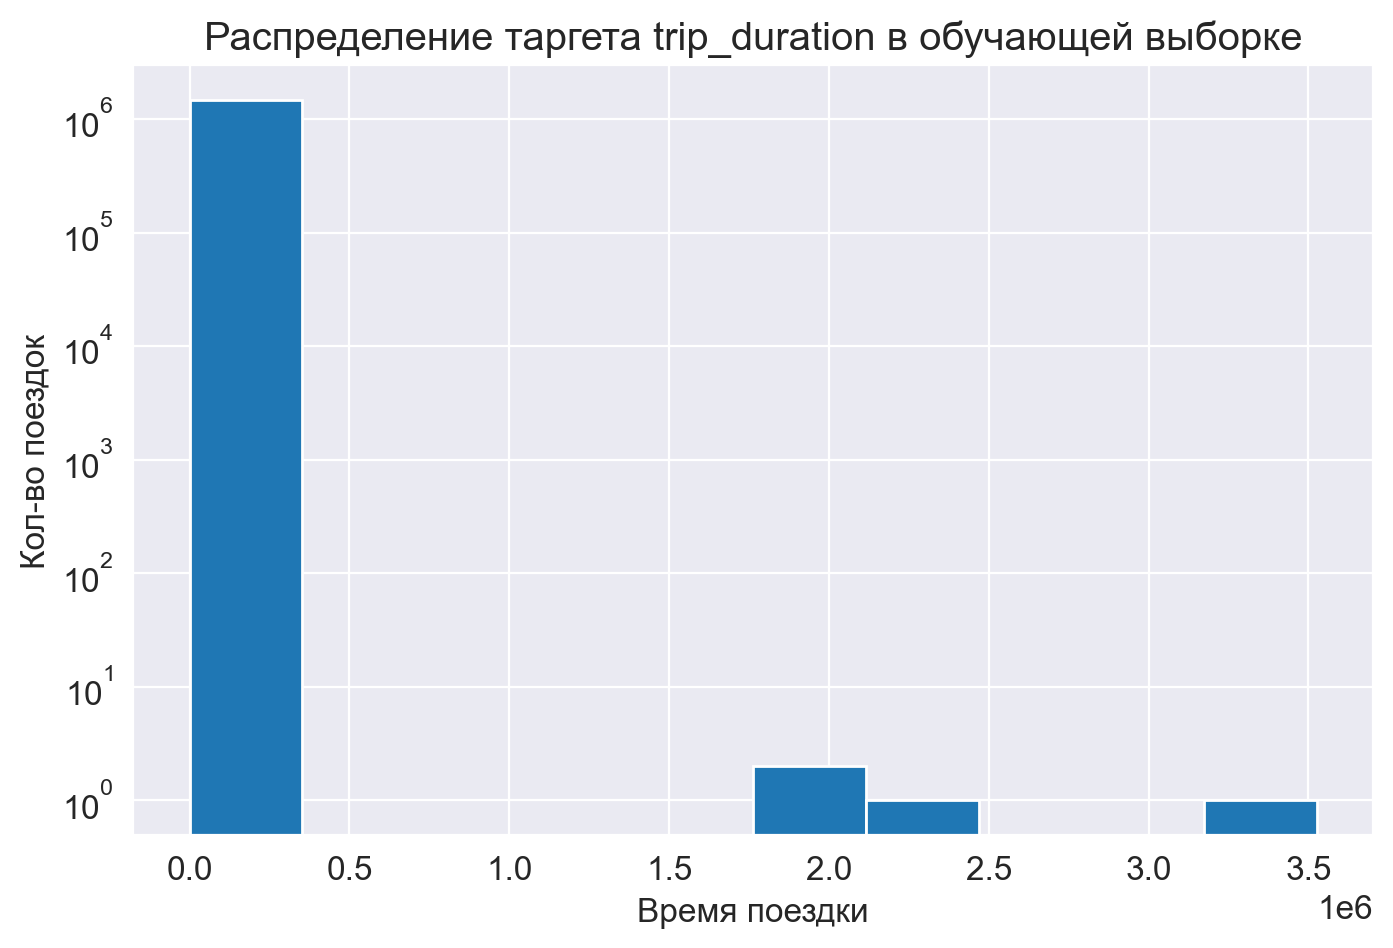

In [6]:
plt.hist(taxi_df['trip_duration'])
plt.yscale('log') 
plt.title('Распределение таргета trip_duration в обучающей выборке')
plt.ylabel('Кол-во поездок')
plt.xlabel('Время поездки')
plt.show()

**Овтет**: по данному графику можно сказать, что время поездки в большинстве случаев не сильно отличается между собой. Но есть случаи аномально большого количества времени поездки, что выбивается из общей массы. На графике видим 3 таких "аномальных кластера". Это может сказаться на качестве обучения в худшую сторону.

При решении данной задачи в качестве метрики качества использовалась RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему была выбрана в качестве метрики именно RMSLE, а не RMSE? (посмотрите внимательно на формулу и подумайте, почему она в данном конкретном случае, действительно будет являться подходящей метрикой)

**Ответ**: RMSLE менее чувствителен к выпадающим (аномальным) значениям, чем RMSE. RMSE наказывает только за общий масштаб ошибки, в то время как RMSLE наказывает за масштаб ошибки относительно фактического значения. Например, у нас есть время 100 секунд и 10000 секунд. Мы предсказали 101 и 10100 соответсвенно. В случае в RMSE мы ошиблись на 1 и на 100. Нейросеть "подумает", что ошибка во втором случае довольно существенна и надо что-то сильно переделывать. Но на деле это не столь критично по отношению к правильному значению. В процентах мы ошиблись всего на 1%, что уже выглядит не так ужасно. В нашей задаче у нас есть очень маленькие о очень большие значения (что видно на графике). При таком разбросе лучше использовать относительные ошибки.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, а точнее сказать модификации линейной регресии,и каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.



**Ответ**: взятие корня это монотонное преобразование, оно не влияет на оптимизацию.
В случае с логарифмом: формула MSE выглядит примерно так $$\text{MSE}(X, y, a) = \frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2$$
Нашe обозначениt $\hat{y}_i = \log{(y_i + 1)}$ выглядит аналогично как в формуле RMSLE. Имеем ввиду, что а - это на выходе тоже логарифм. И получаем разницу логарифмов, как и в формуле RMSLE

В итоге, наша рассматриваемая задача оптимизации RMSLE была сведена к задаче оптимизации MSE, которую мы вполне умеем решать. Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [7]:
import numpy as np


taxi_df['log_trip_duration'] = np.log1p(taxi_df['trip_duration'])
taxi_df = taxi_df.drop("trip_duration", axis=1)
taxi_df


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256


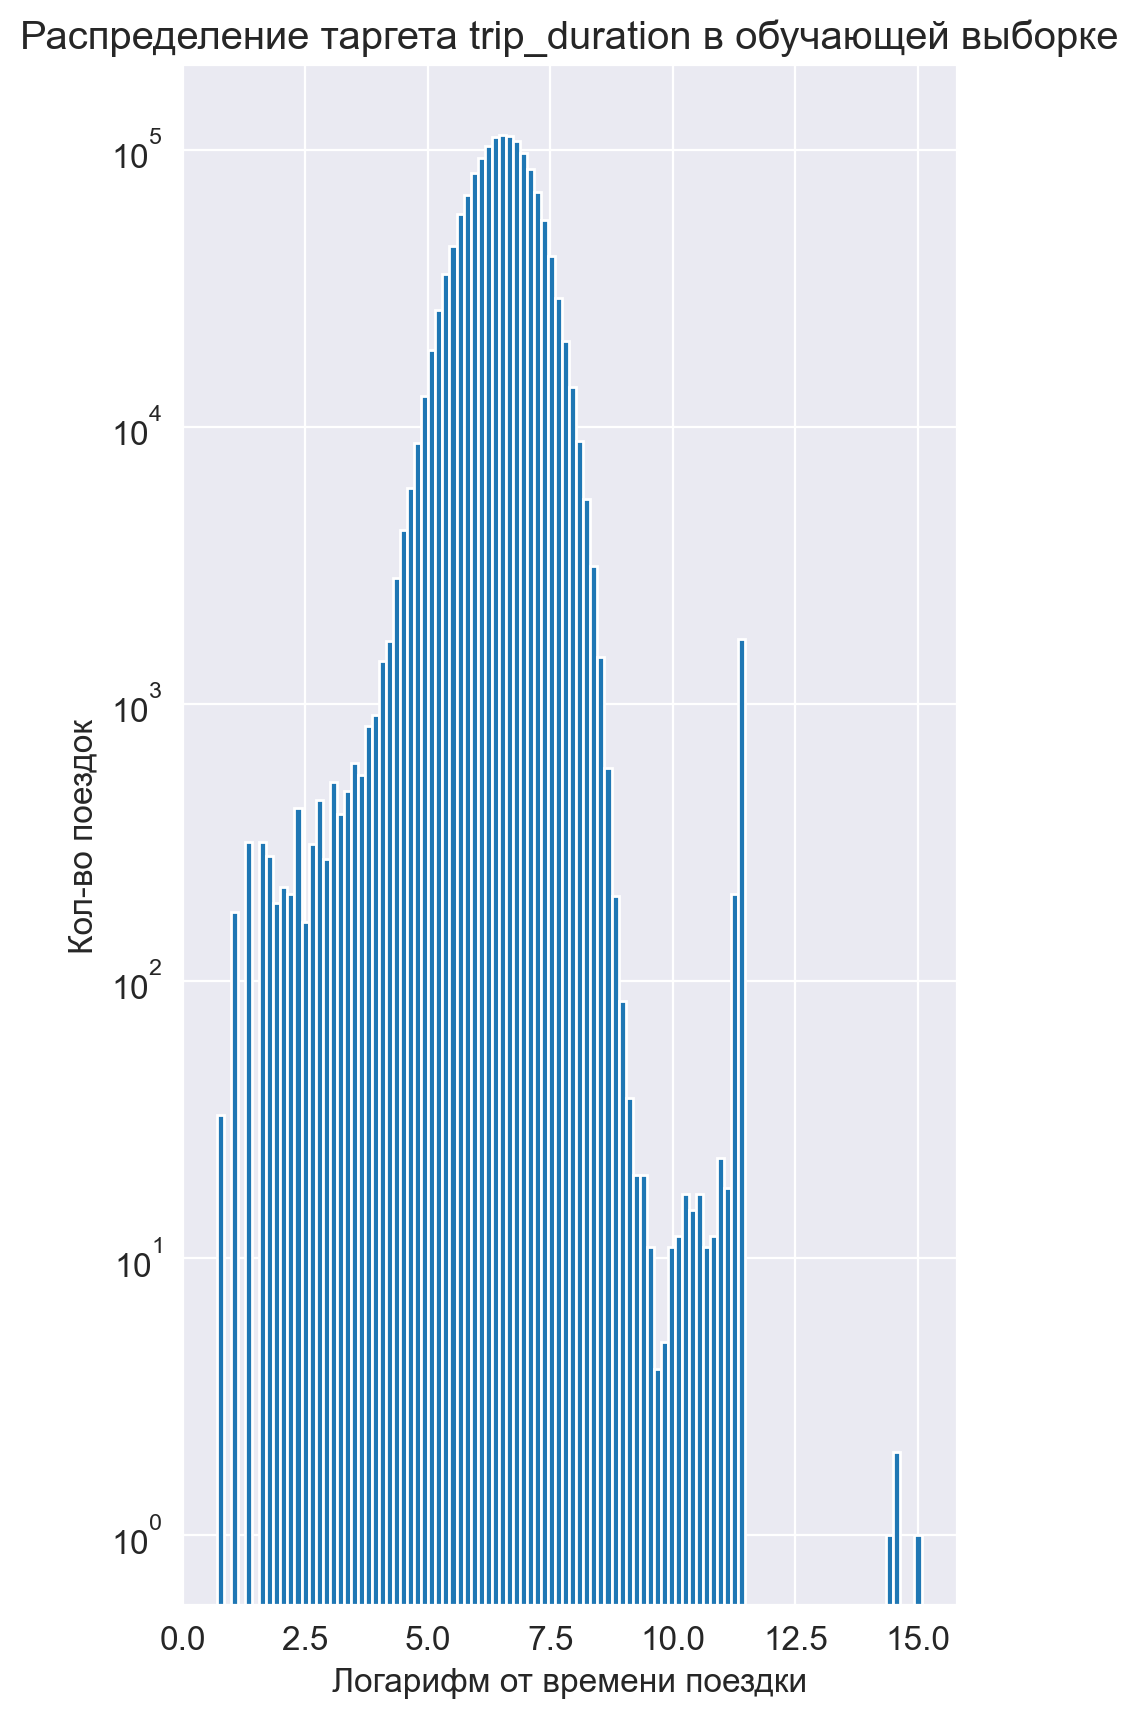

In [8]:
plt.figure(figsize=(5, 10))
plt.hist(taxi_df['log_trip_duration'], bins=100)
plt.yscale('log') 
plt.title('Распределение таргета trip_duration в обучающей выборке')
plt.ylabel('Кол-во поездок')
plt.xlabel('Логарифм от времени поездки')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при  константном предсказании:

In [9]:
# Если я правильно понял, можно взять среднее значение log_trip_duration как предсказанное и посмотреть метрику 
from sklearn.metrics import mean_squared_error, root_mean_squared_log_error, root_mean_squared_error


y_pred = np.full(taxi_df.shape[0], float(taxi_df['log_trip_duration'].mean()))

# Может я дурак, но этот принт не работает, жалуется на squared. Скорее всего проблема в версиях)
# используется python 3.12.7, scikit-learn==1.6.1, VS code

# print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

print(f"RMSLE = {root_mean_squared_log_error(taxi_df['log_trip_duration'], y_pred)}")
print(f"RMSE = {root_mean_squared_error(taxi_df['log_trip_duration'], y_pred)}")
print(f"MSE = {mean_squared_error(taxi_df['log_trip_duration'], y_pred)}")

# RMSE - Средняя ошибка прогнозирования модели в единицах интересующей модели (ошибаемся на +/- столько-то)

RMSLE = 0.11334510822456444
RMSE = 0.7957592365411509
MSE = 0.6332327625405553


## Выделение признаков, визуализация и работа с `pickup_datetime` (3 балла)

                        

**Задание 1.2 (0.5 баллов)**. Первое с чего стоит начать и кажется самым логичным --- это посмотреть, сколько всего было поездок в каждый из дней. Для этого Вам следует построить график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

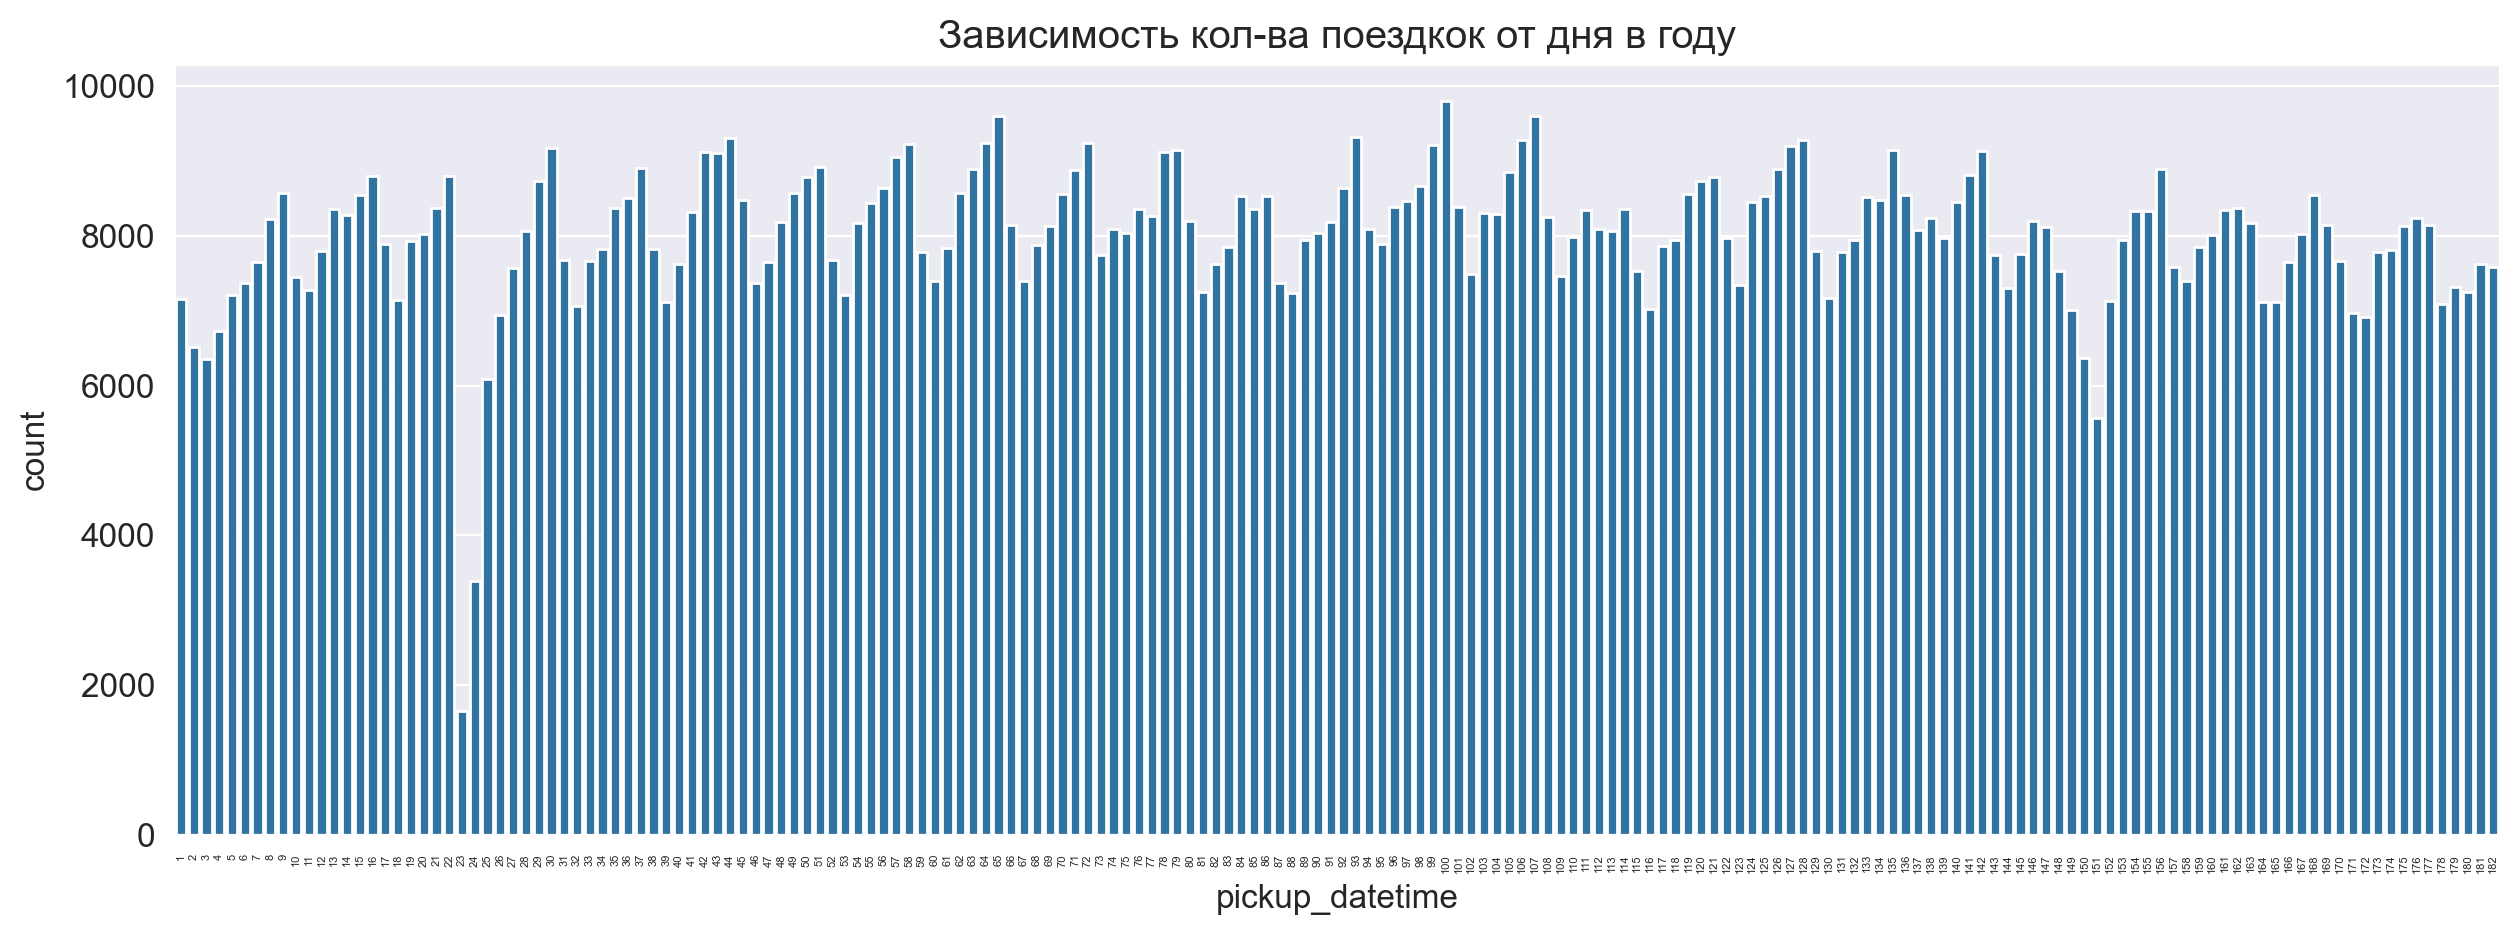

In [10]:
plt.figure(figsize=(15, 5))
sns.countplot(x = taxi_df['pickup_datetime'].dt.dayofyear)
plt.xticks(rotation=90)
plt.xticks(fontsize=4)
plt.title("Зависимость кол-ва поездкок от дня в году")
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

**Ответ**: 23 января 2016 года в Нью-Йорке была сильная снежная буря, из-за чего запретили движение автомобилей

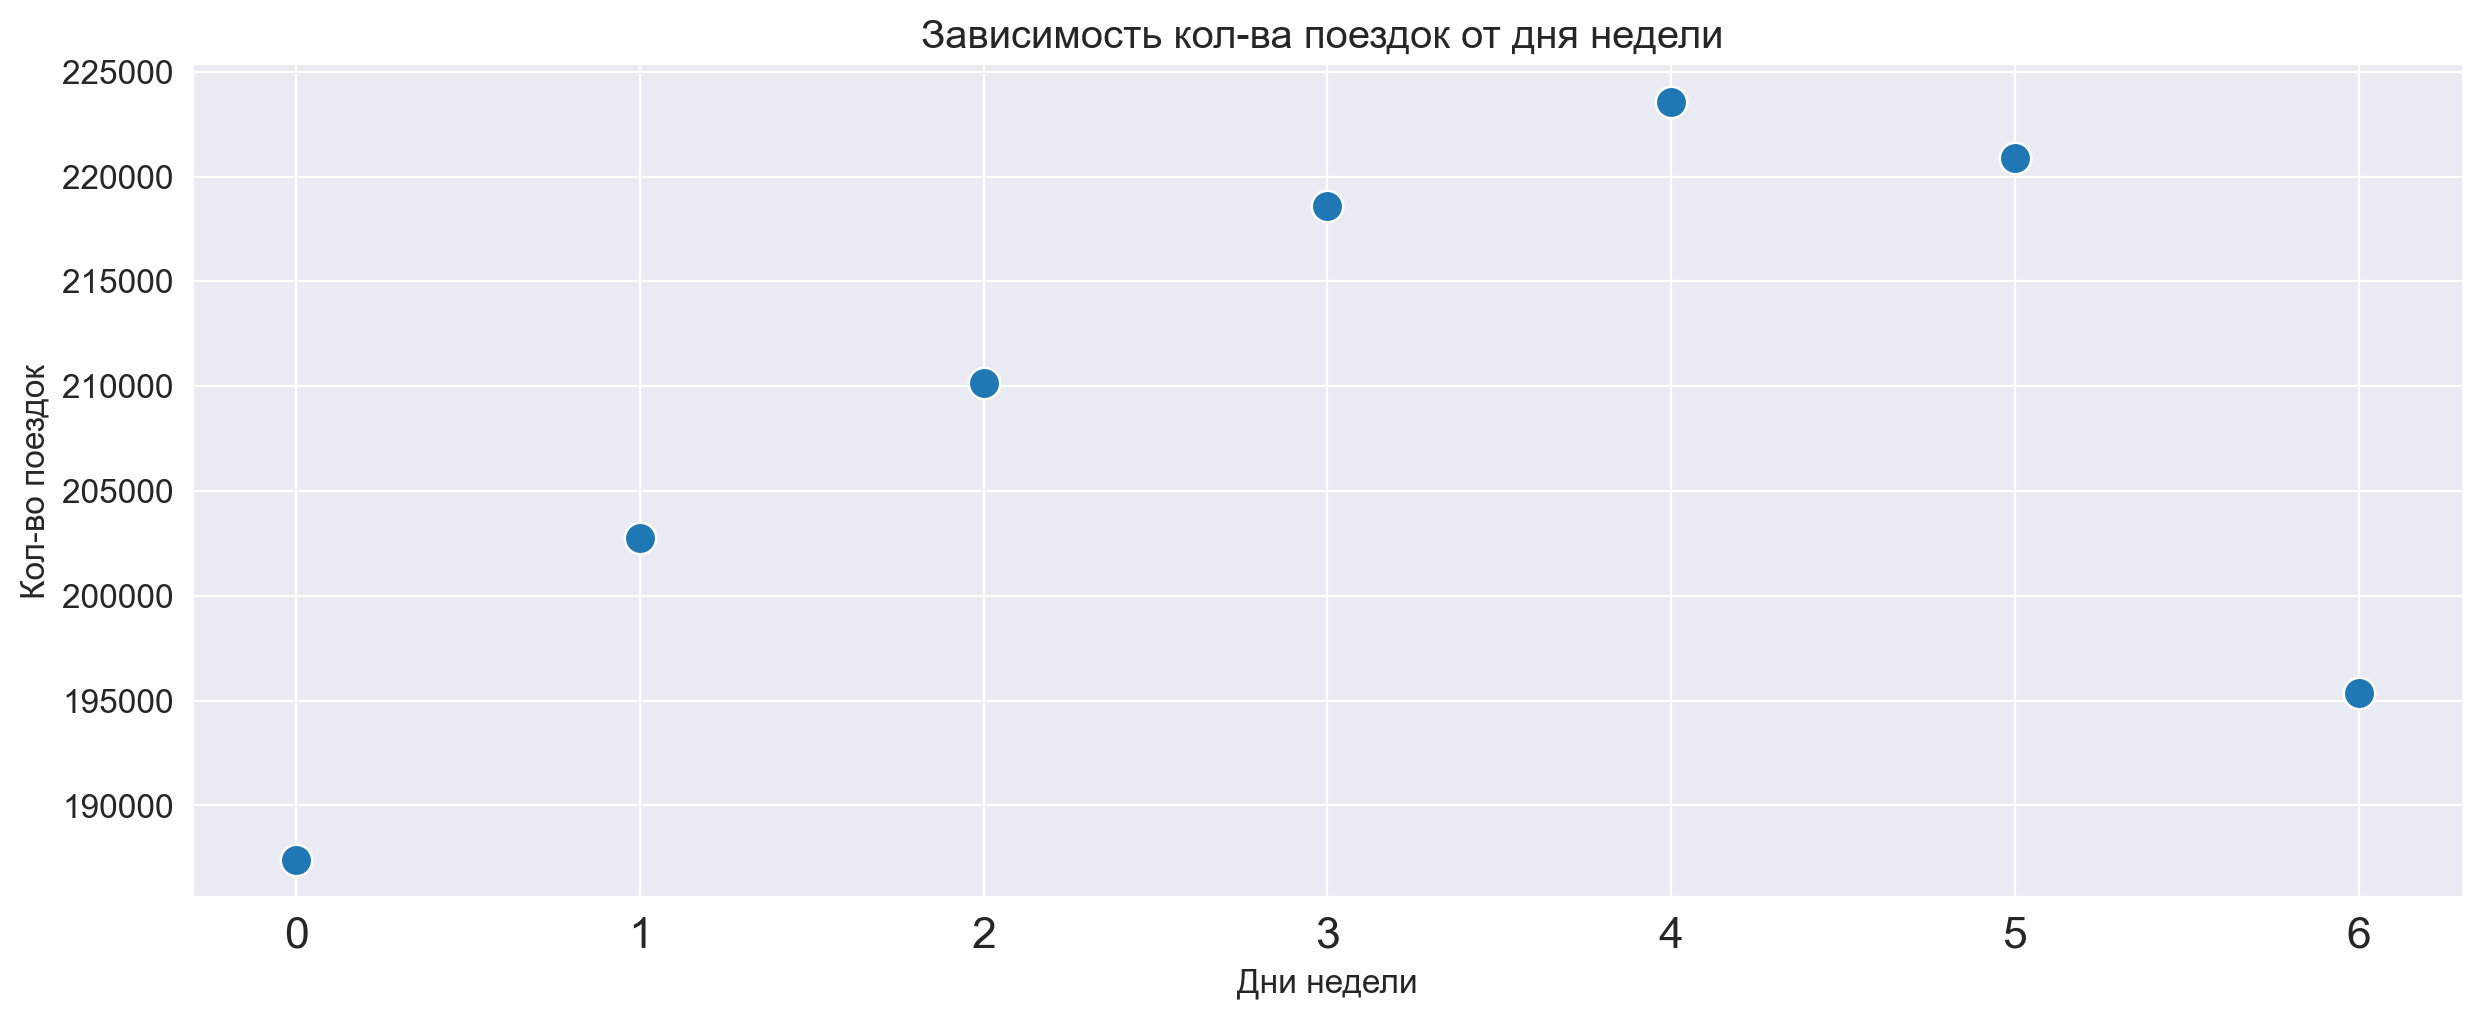

In [11]:
# plt.figure(figsize=(10, 5)) # с этим графиком он почему то не работает(
fig = sns.relplot(taxi_df.groupby(taxi_df['pickup_datetime'].dt.weekday).size(), s = 128).figure.set_size_inches(15, 5)
plt.title("Зависимость кол-ва поездок от дня недели ")
plt.xlabel("Дни недели")
plt.ylabel("Кол-во поездок")
plt.xticks(fontsize=16)
plt.show()

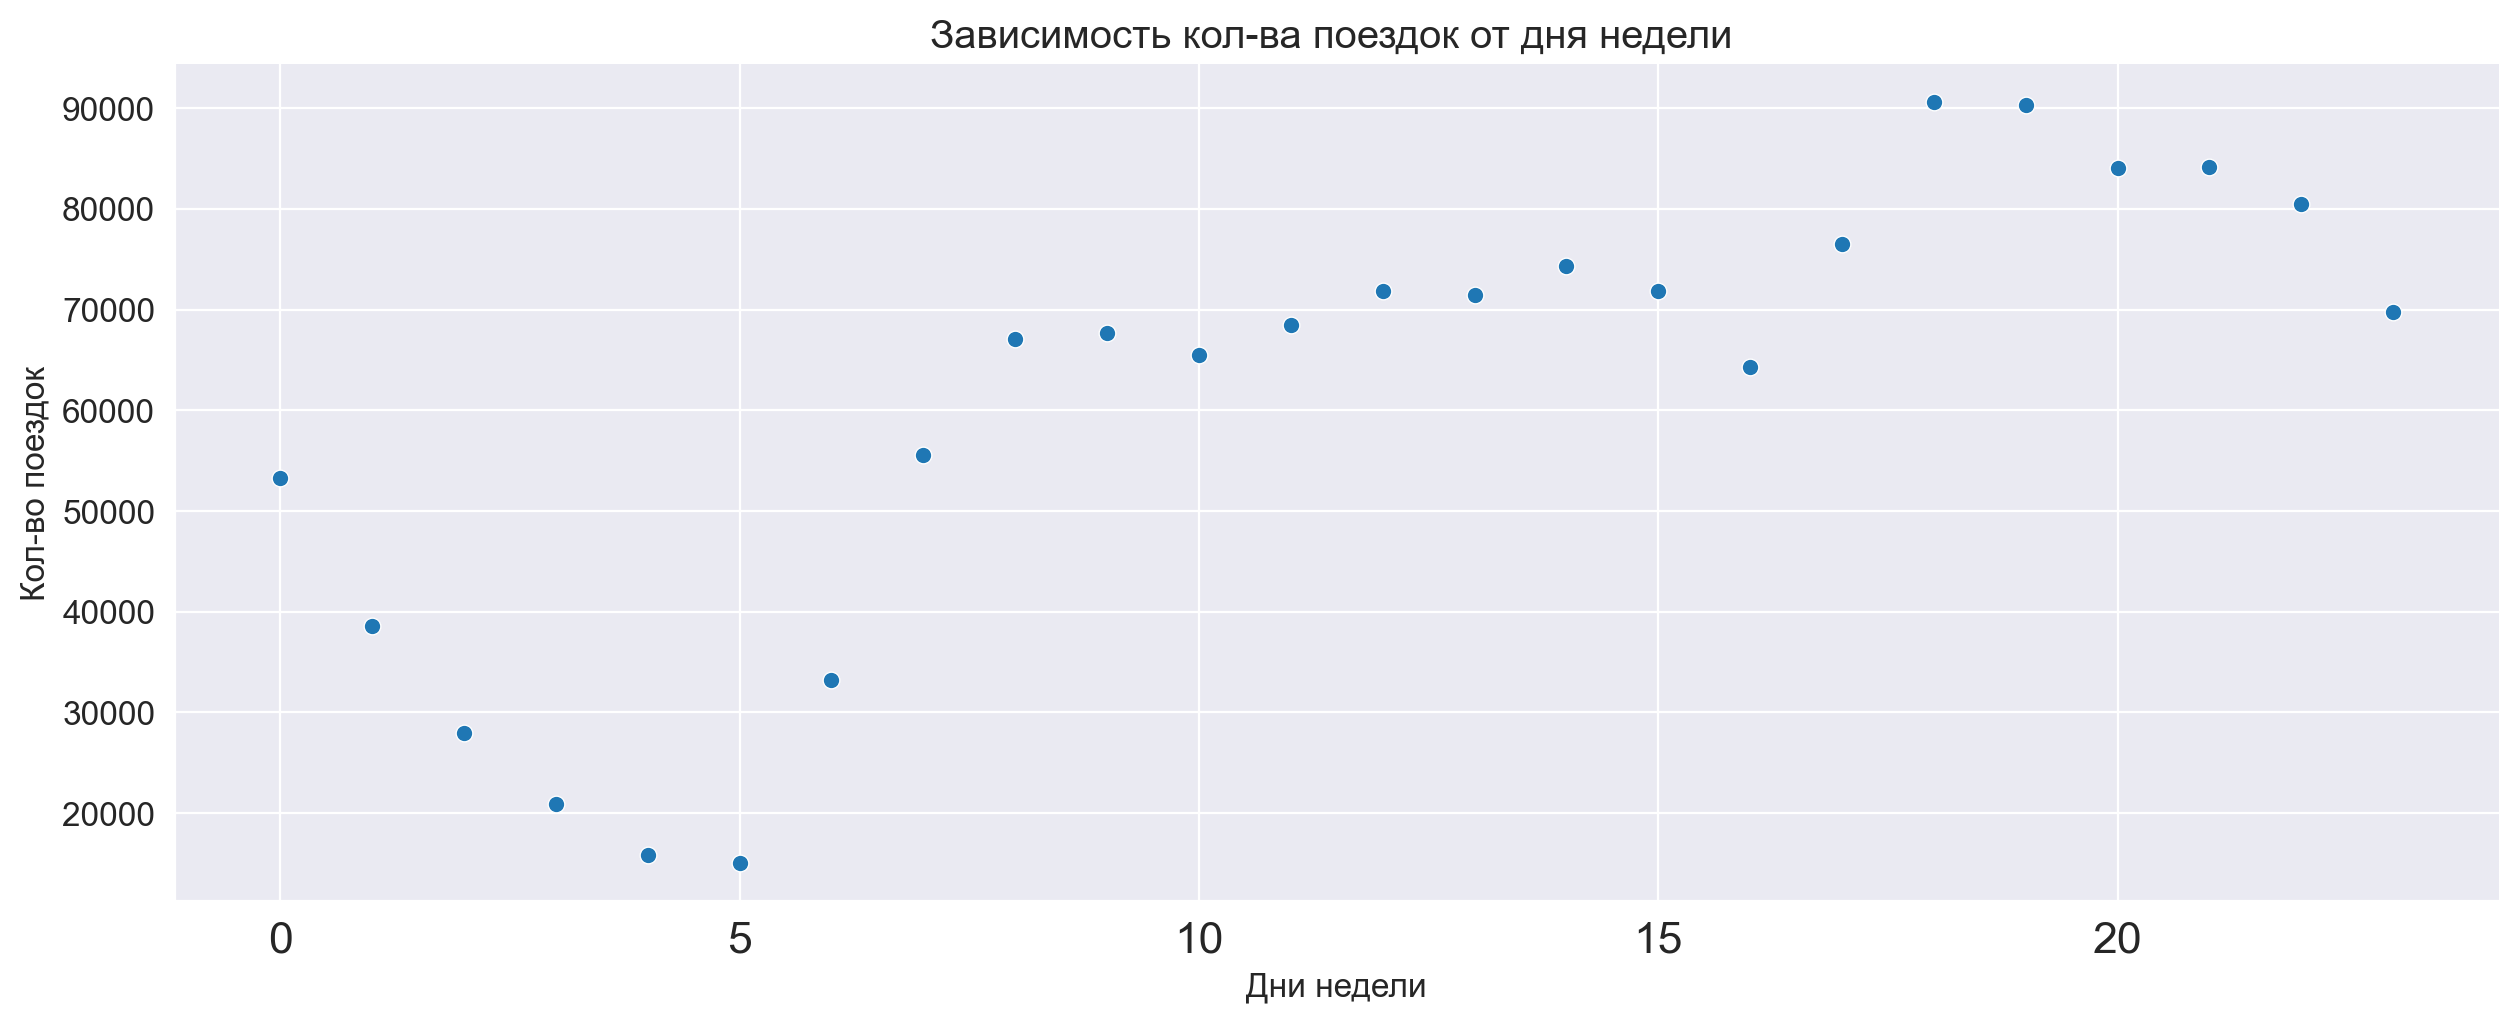

In [12]:
# plt.figure(figsize=(15,5))
sns.relplot(taxi_df.groupby(taxi_df['pickup_datetime'].dt.hour).size()).figure.set_size_inches(15, 5)
plt.title("Зависимость кол-ва поездок от дня недели ")
plt.xlabel("Дни недели")
plt.ylabel("Кол-во поездок")
plt.xticks(fontsize=16)
plt.show()

**Задание 1.3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [13]:
# Добавим в датасет колонки с номером часа, дня недели и месяца для упрощения
taxi_df['hour'] = taxi_df['pickup_datetime'].dt.hour
taxi_df['month'] = taxi_df['pickup_datetime'].dt.month
taxi_df['weekday'] = taxi_df['pickup_datetime'].dt.weekday
taxi_df.head(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,hour,month,weekday
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,17,3,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,0,6,6
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,11,1,1
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,19,4,2
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,13,3,5
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,6.095825,22,1,5
6,id1813257,1,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,5.834811,22,6,4
7,id1324603,2,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,7.347300,7,5,5
8,id1301050,1,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,5.545177,23,5,4
9,id0012891,2,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,7.111512,21,3,3


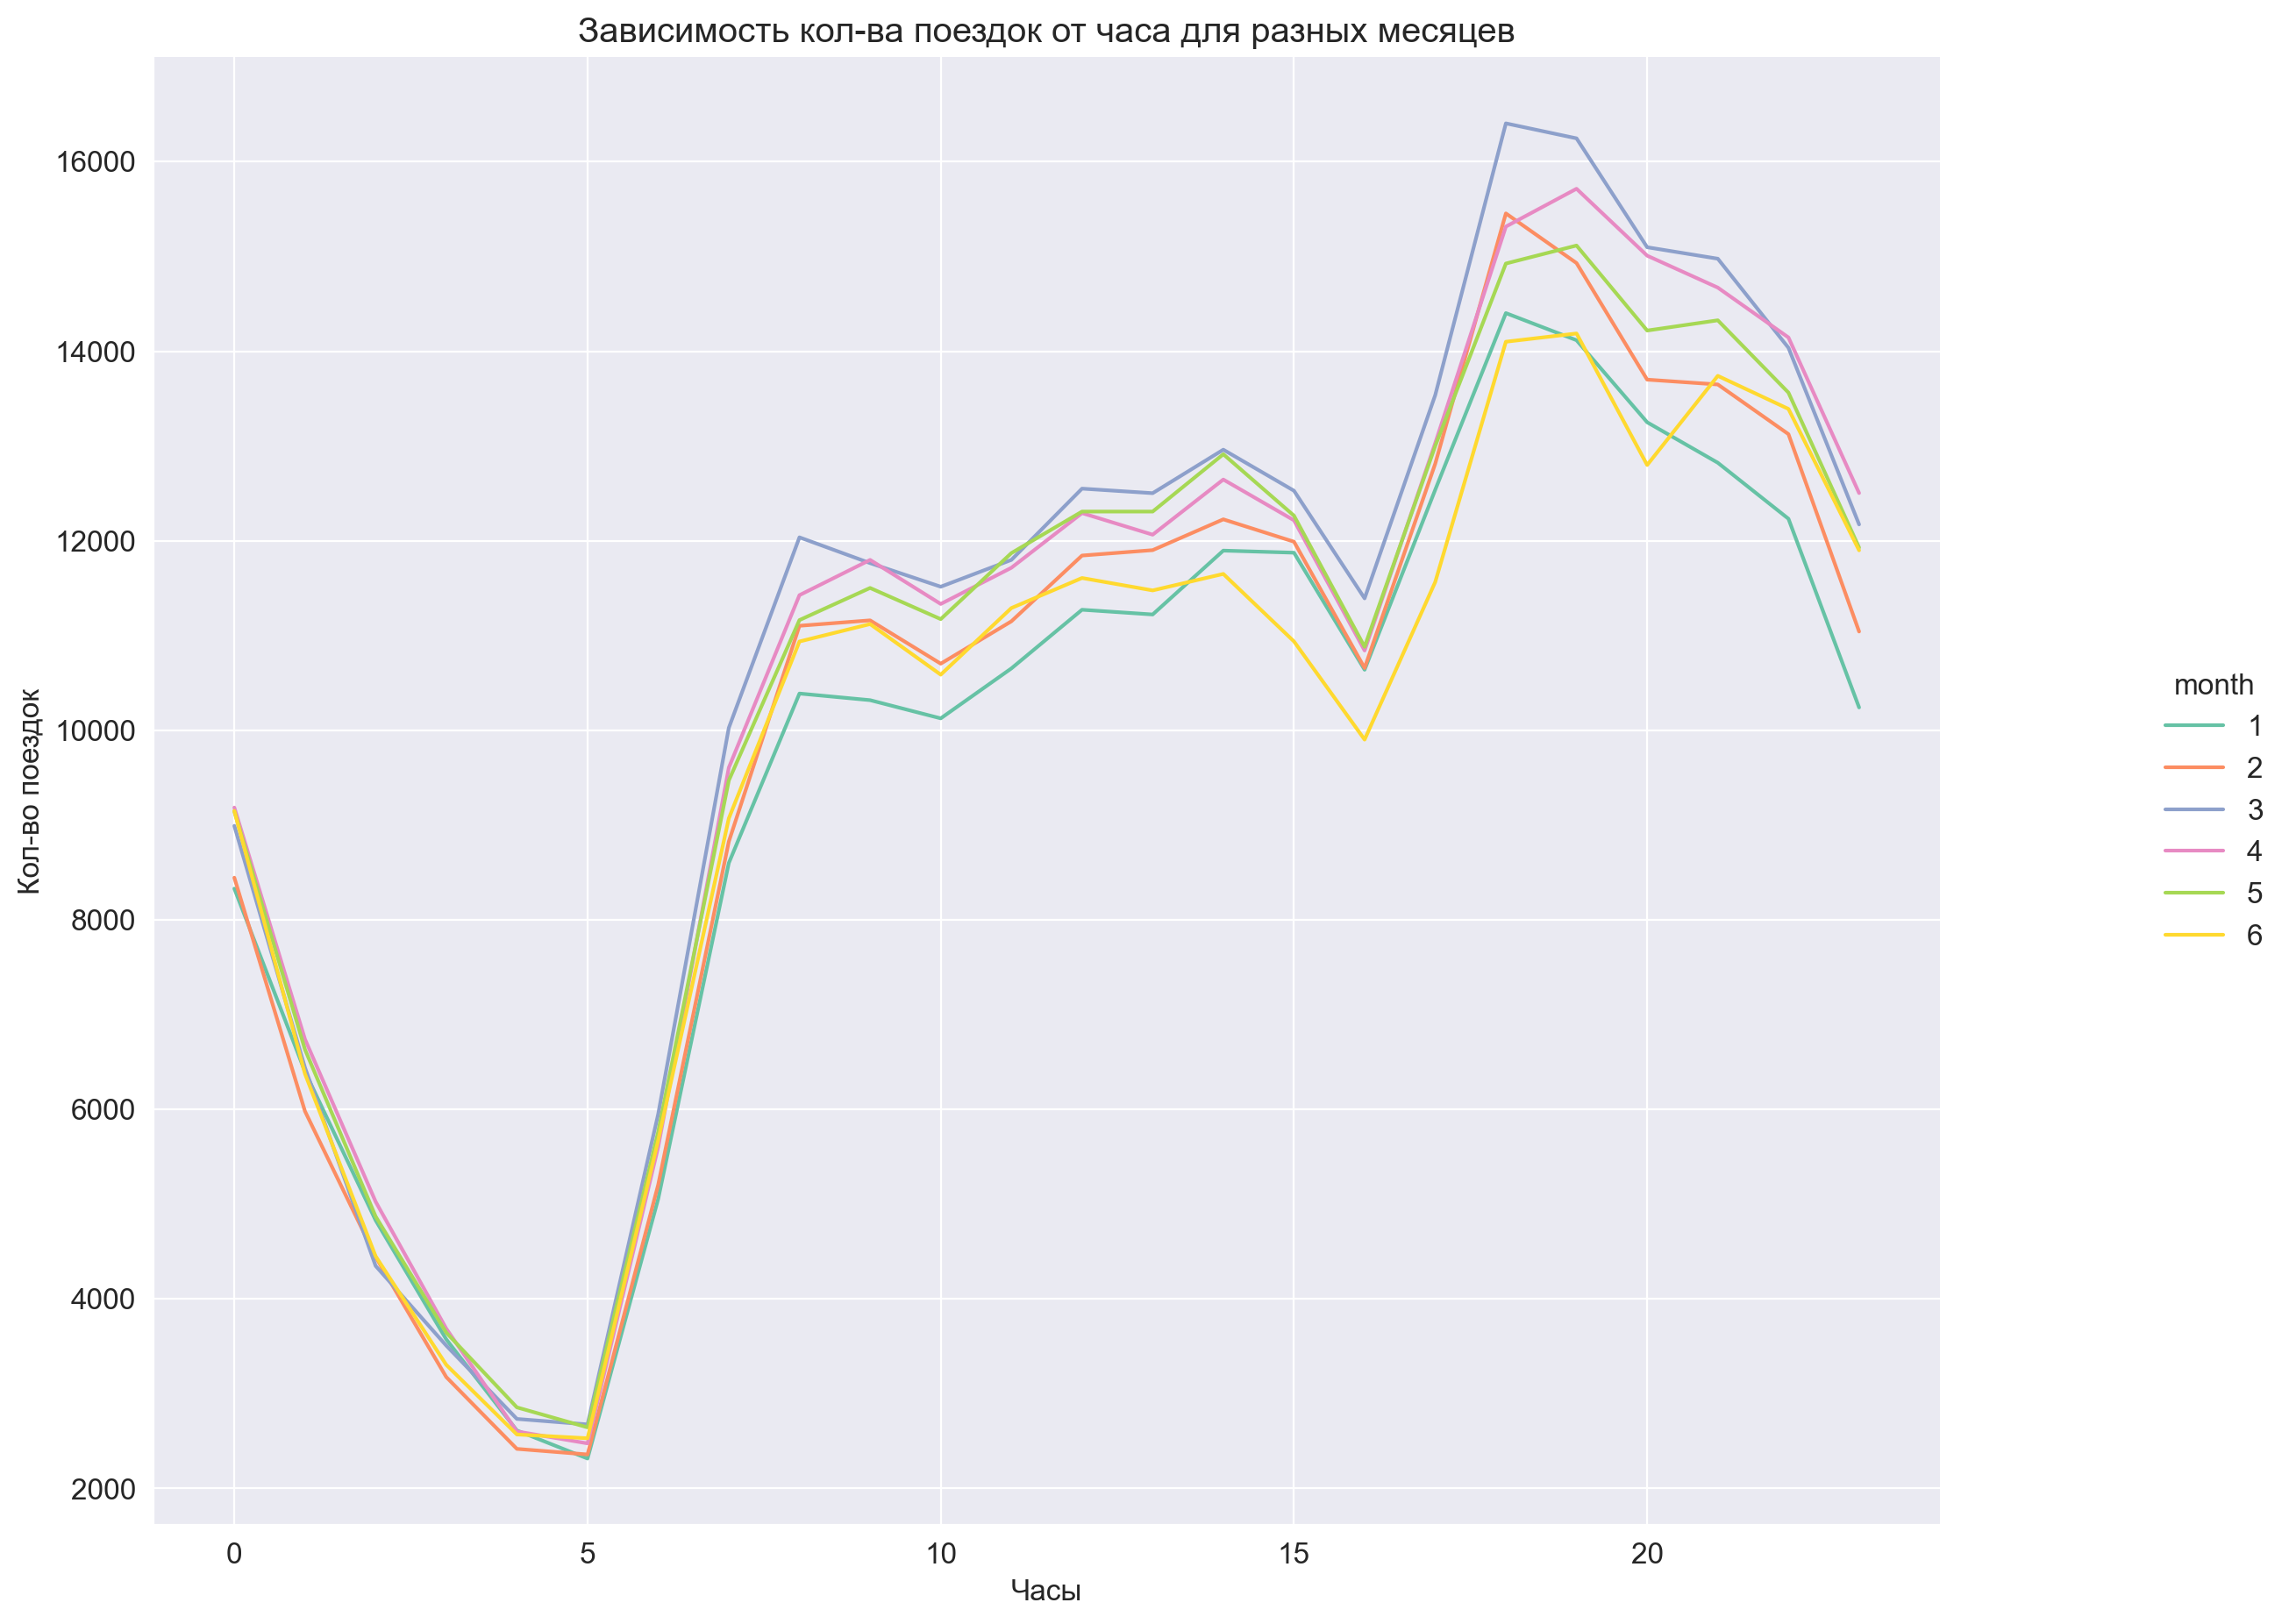

In [14]:
sns.relplot(data=taxi_df.groupby(['hour', 'month']).count()[['id']], x='hour', y='id', kind = "line", hue='month', palette='Set2').figure.set_size_inches(15, 10)
plt.xlabel('Часы')
plt.ylabel('Кол-во поездок')
plt.title("Зависимость кол-ва поездок от часа для разных месяцев")
plt.show()

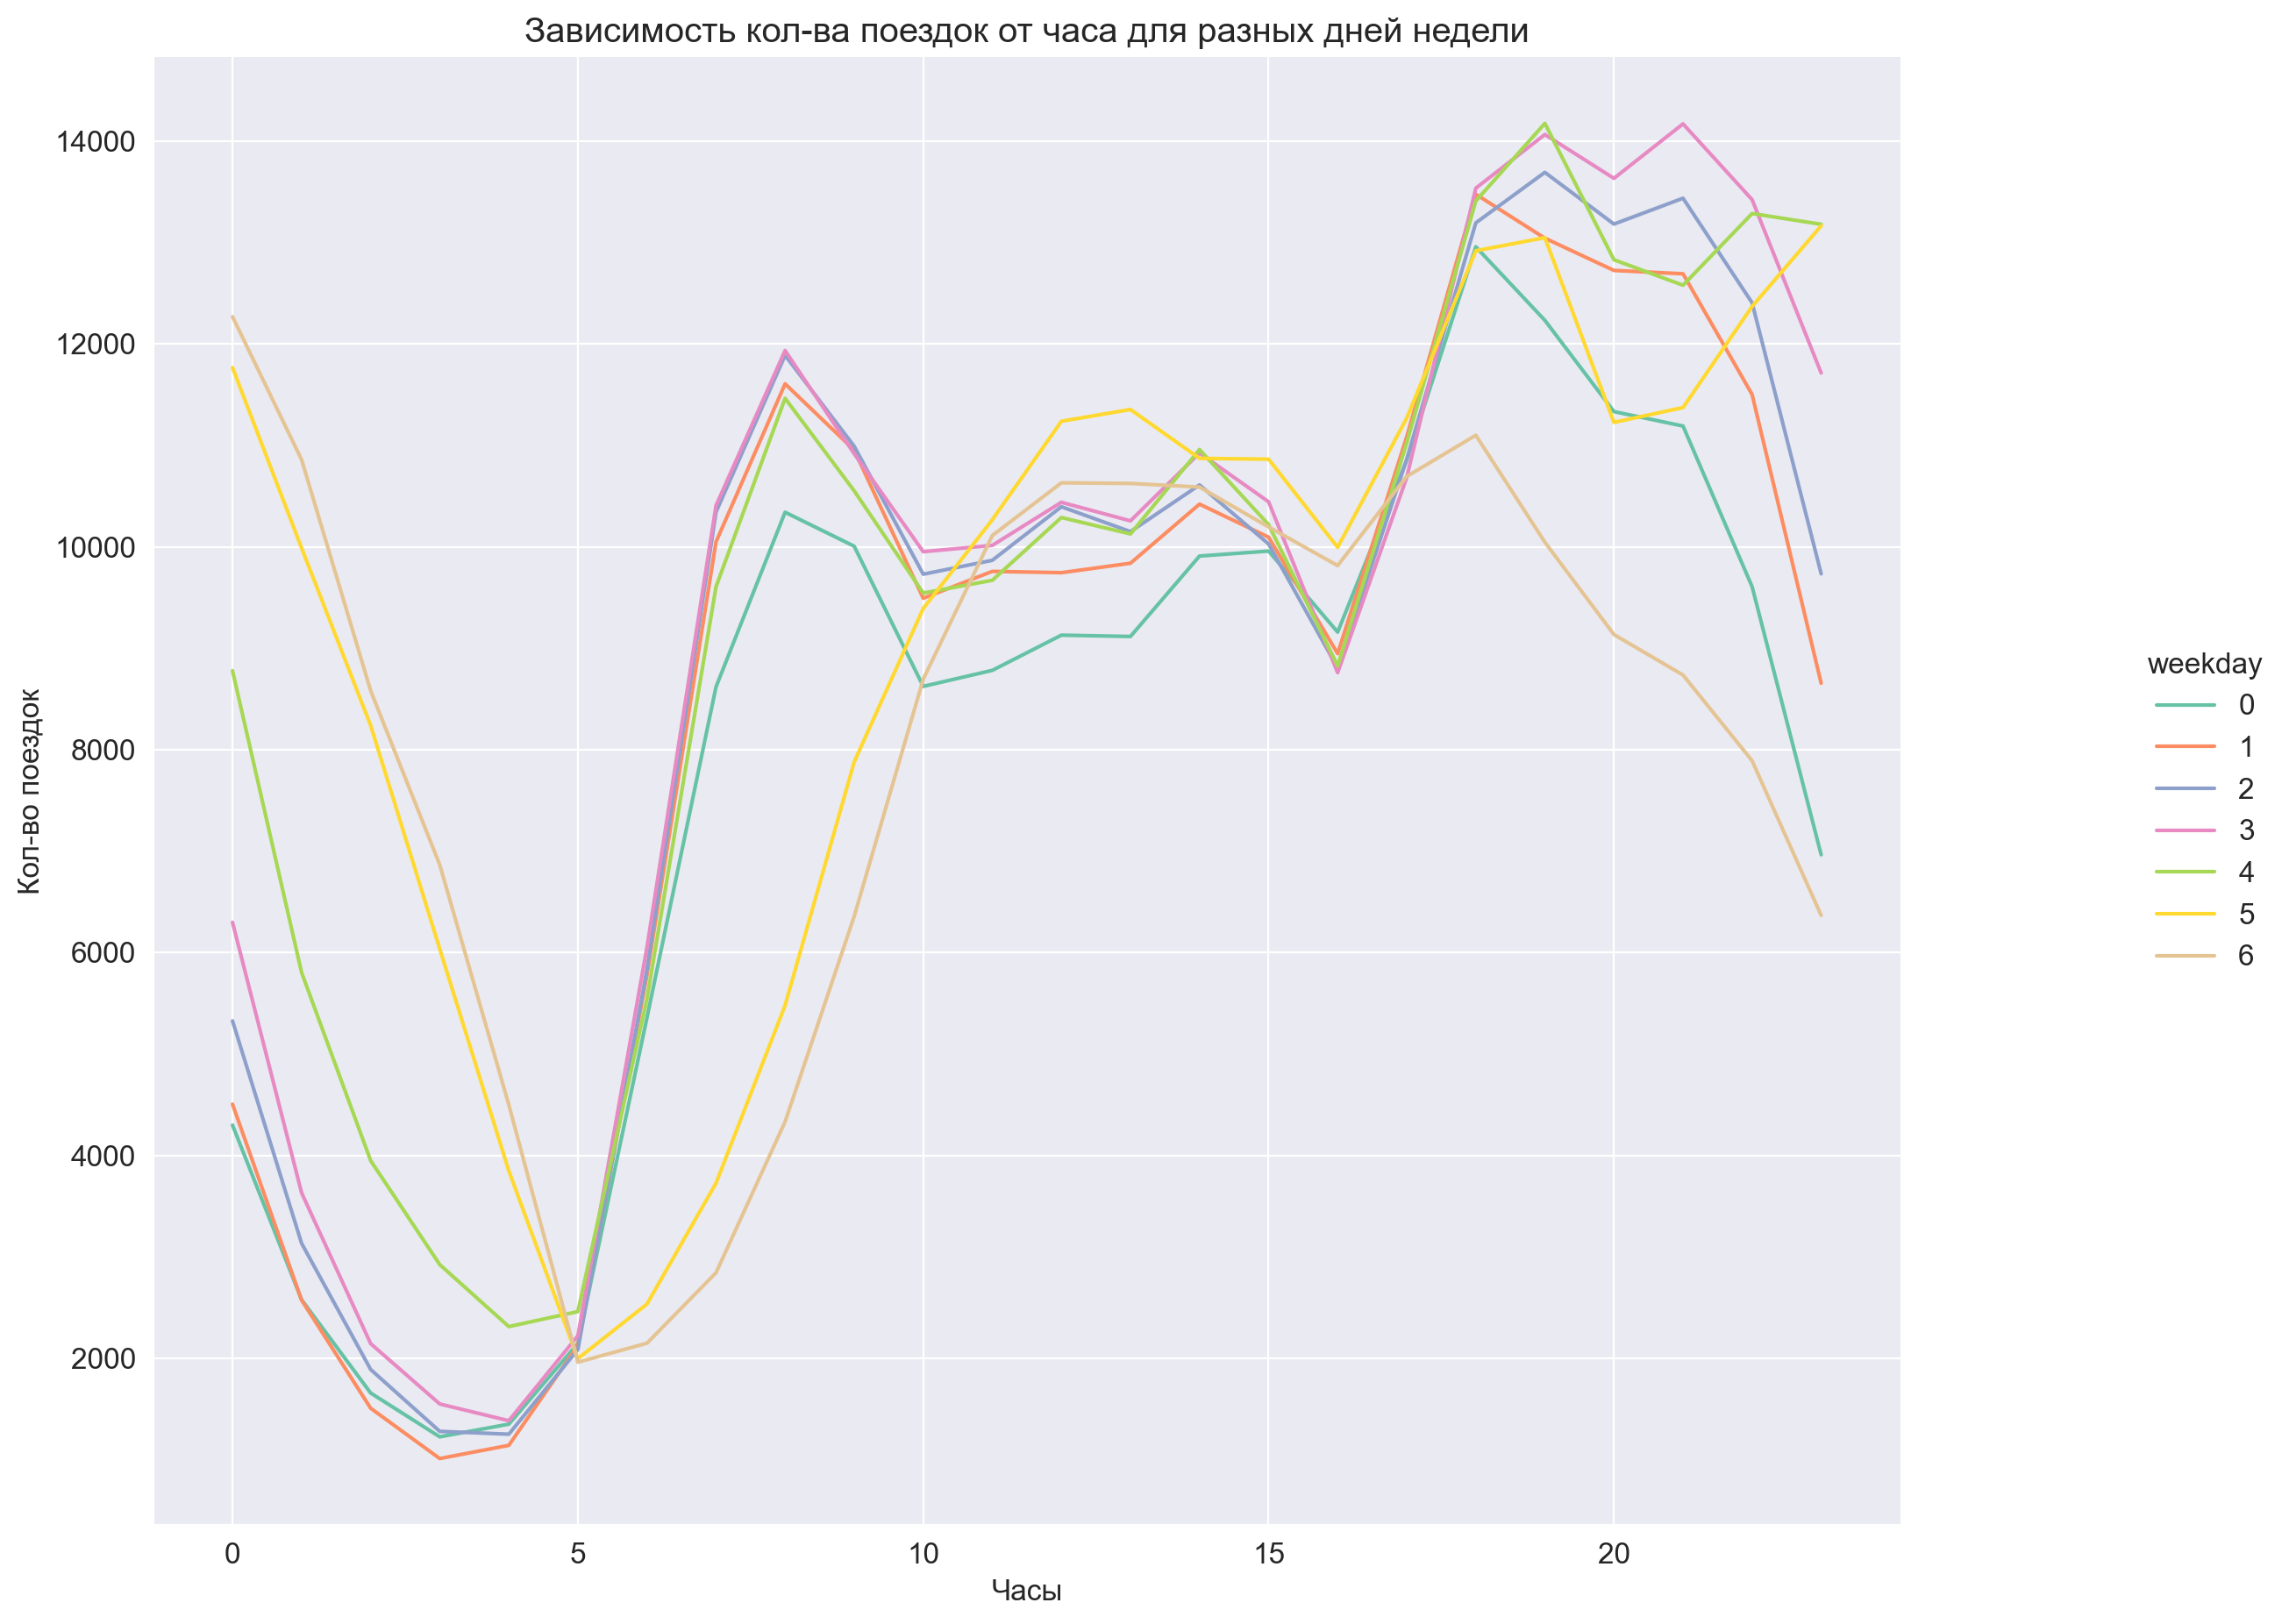

In [15]:
sns.relplot(data=taxi_df.groupby(['hour', 'weekday']).count()[['id']], x='hour', y='id', kind = "line", hue='weekday', palette='Set2').figure.set_size_inches(15, 10)
plt.xlabel('Часы')
plt.ylabel('Кол-во поездок')
plt.title("Зависимость кол-ва поездок от часа для разных дней недели")
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Самым популярным месяцем стал март. Самые непопулярные месяцы - явнарь и июнь. Больше всего заказывают такси в районе 18-20 часов. Меньше всего в 5 утра. Самый непопулярный день недели воскресенье, но в воскресенье чаще всего заказывают такси по утрам.

**Задание 1.4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

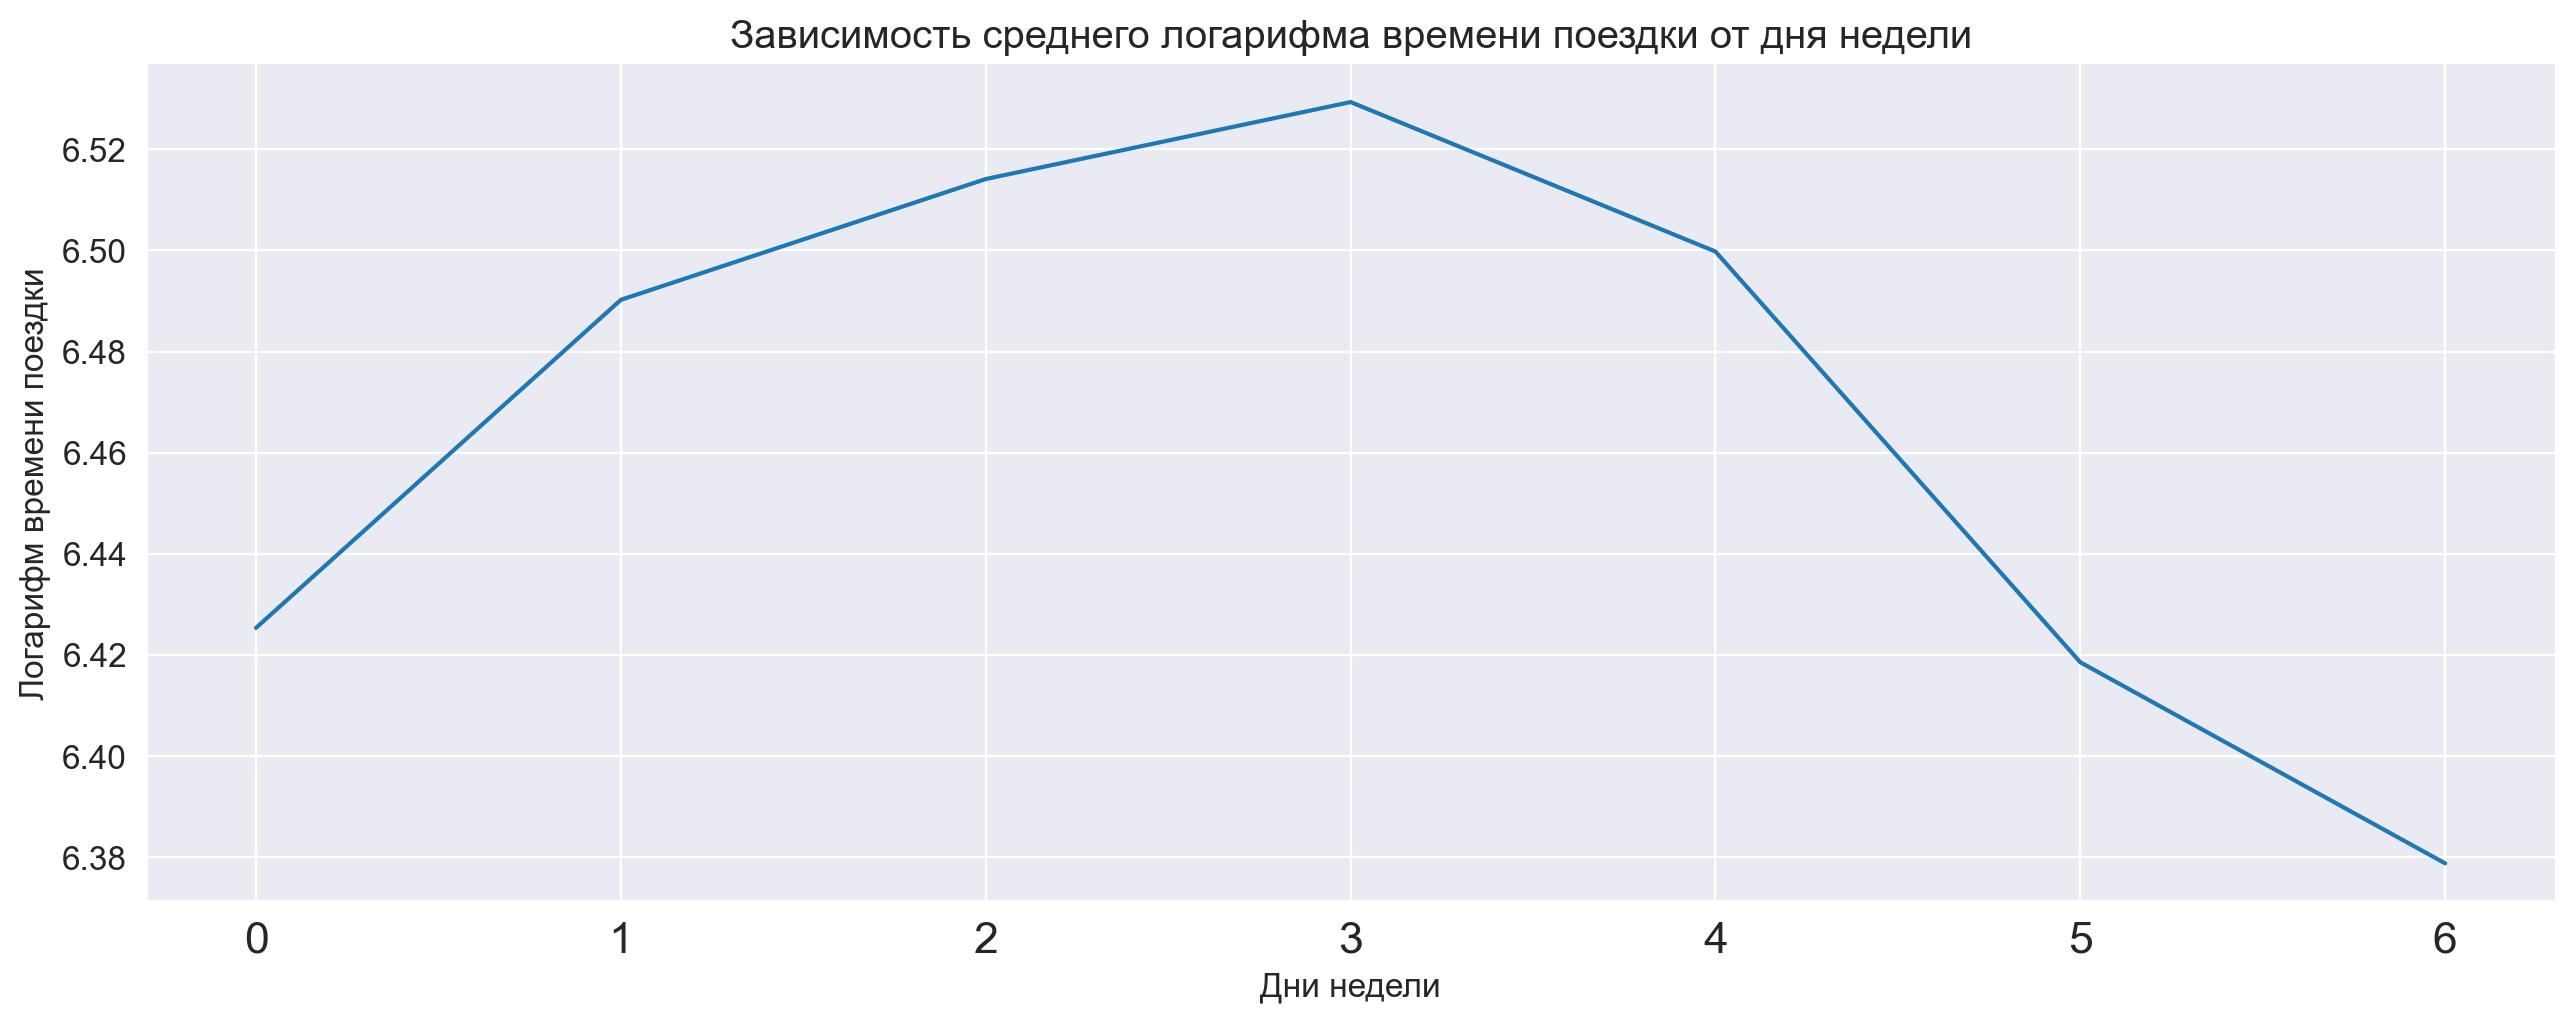

In [16]:
from sklearn.model_selection import train_test_split

y = taxi_df["log_trip_duration"]
# X = taxi_df.drop(columns=["log_trip_duration"]) 

X_train, X_test, y_train, y_test = train_test_split(taxi_df, y, test_size=0.3, random_state=1)

sns.relplot(X_train.groupby('weekday')['log_trip_duration'].mean(), kind='line').figure.set_size_inches(15, 5)
plt.title("Зависимость среднего логарифма времени поездки от дня недели")
plt.xlabel("Дни недели")
plt.ylabel("Логарифм времени поездки")
plt.xticks(fontsize=16)
plt.show()

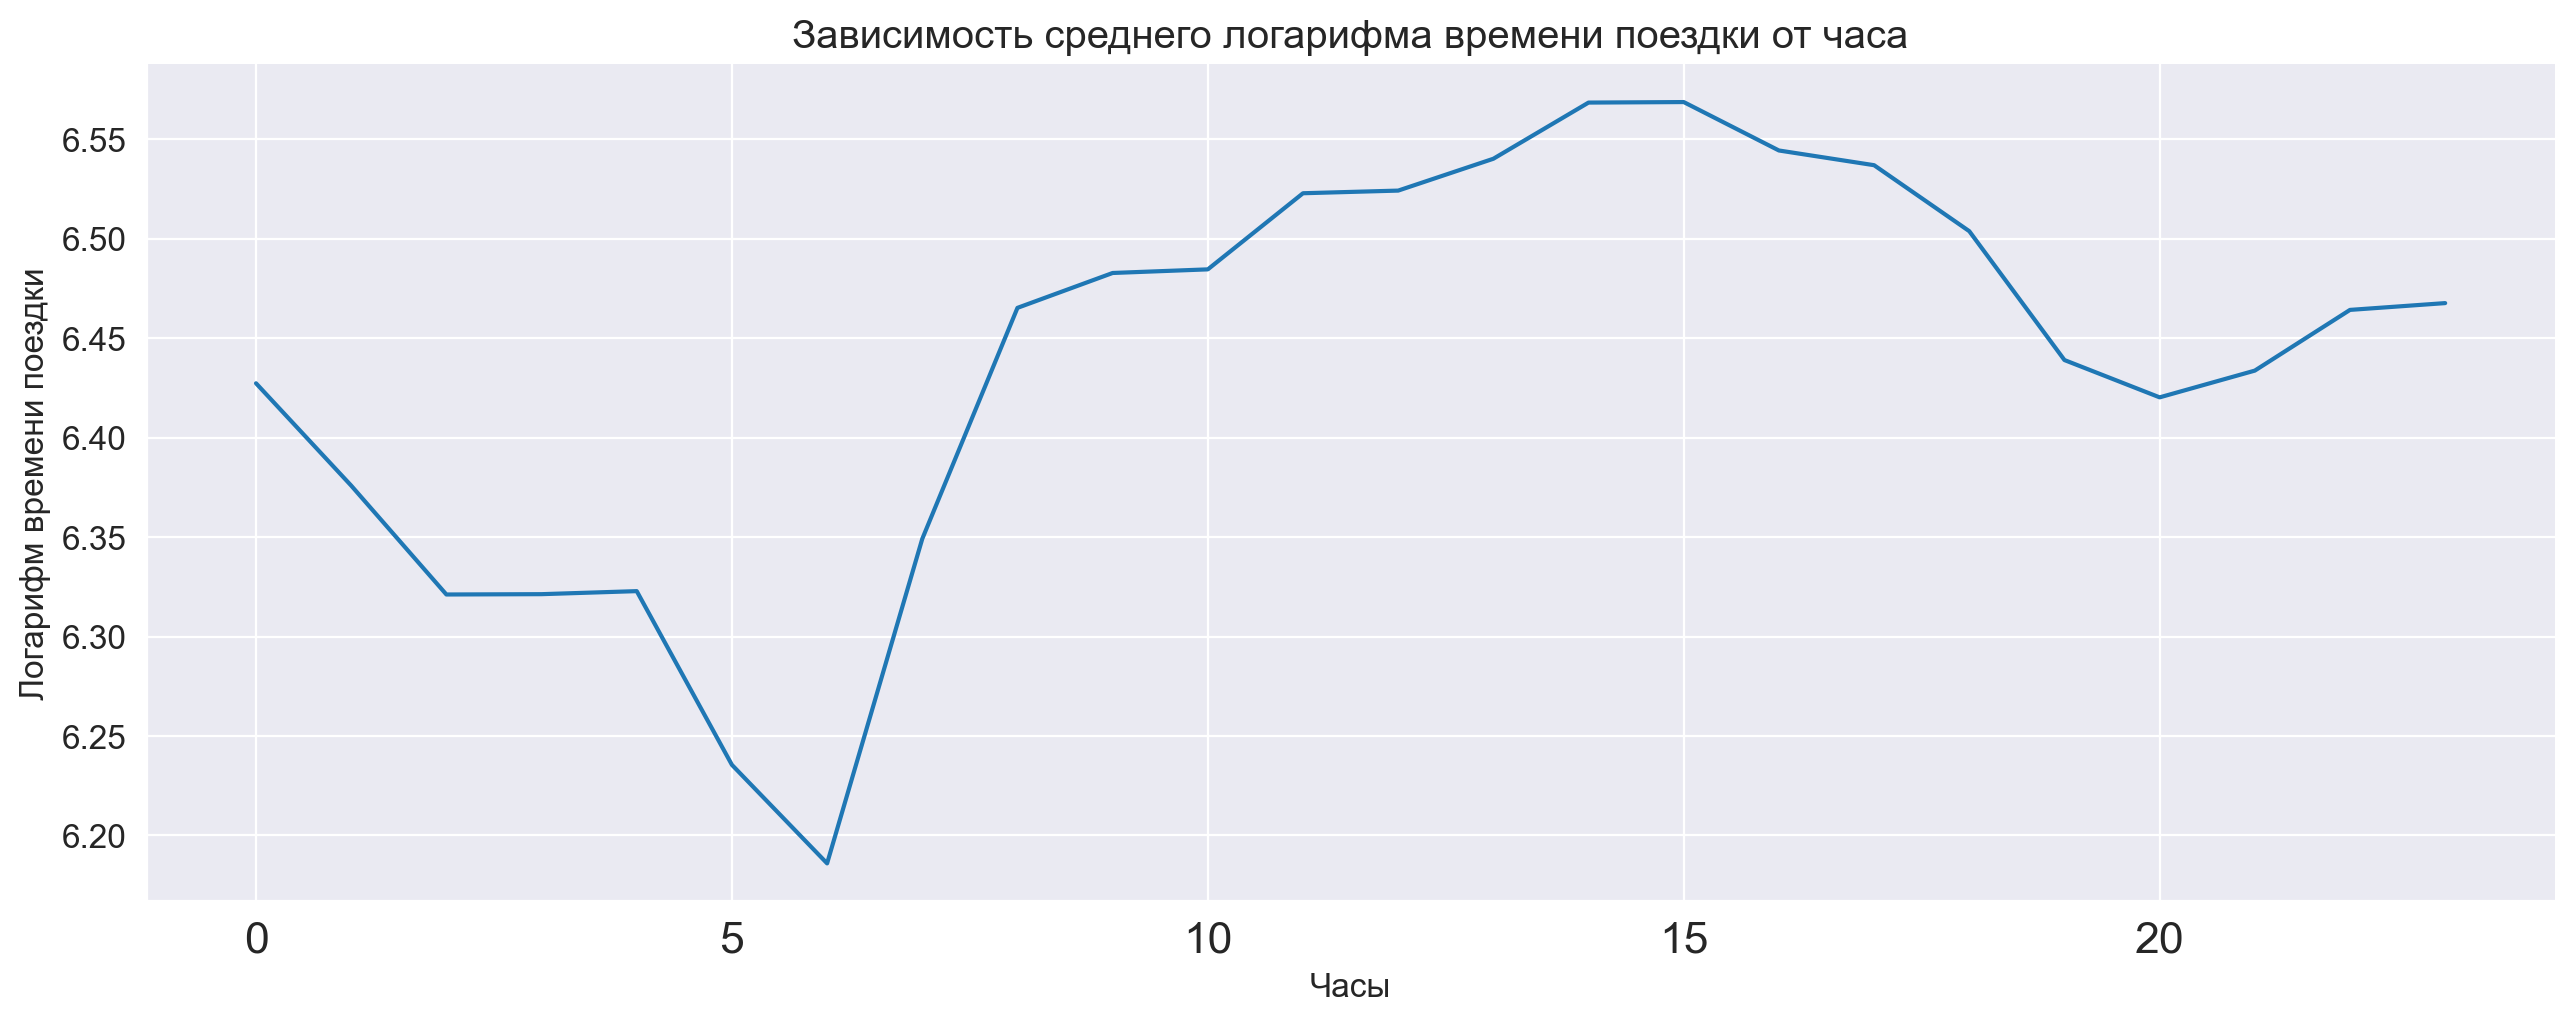

In [17]:
sns.relplot(X_train.groupby('hour')['log_trip_duration'].mean(), kind='line').figure.set_size_inches(15, 5)
plt.title("Зависимость среднего логарифма времени поездки от часа")
plt.xlabel("Часы")
plt.ylabel("Логарифм времени поездки")
plt.xticks(fontsize=16)
plt.show()

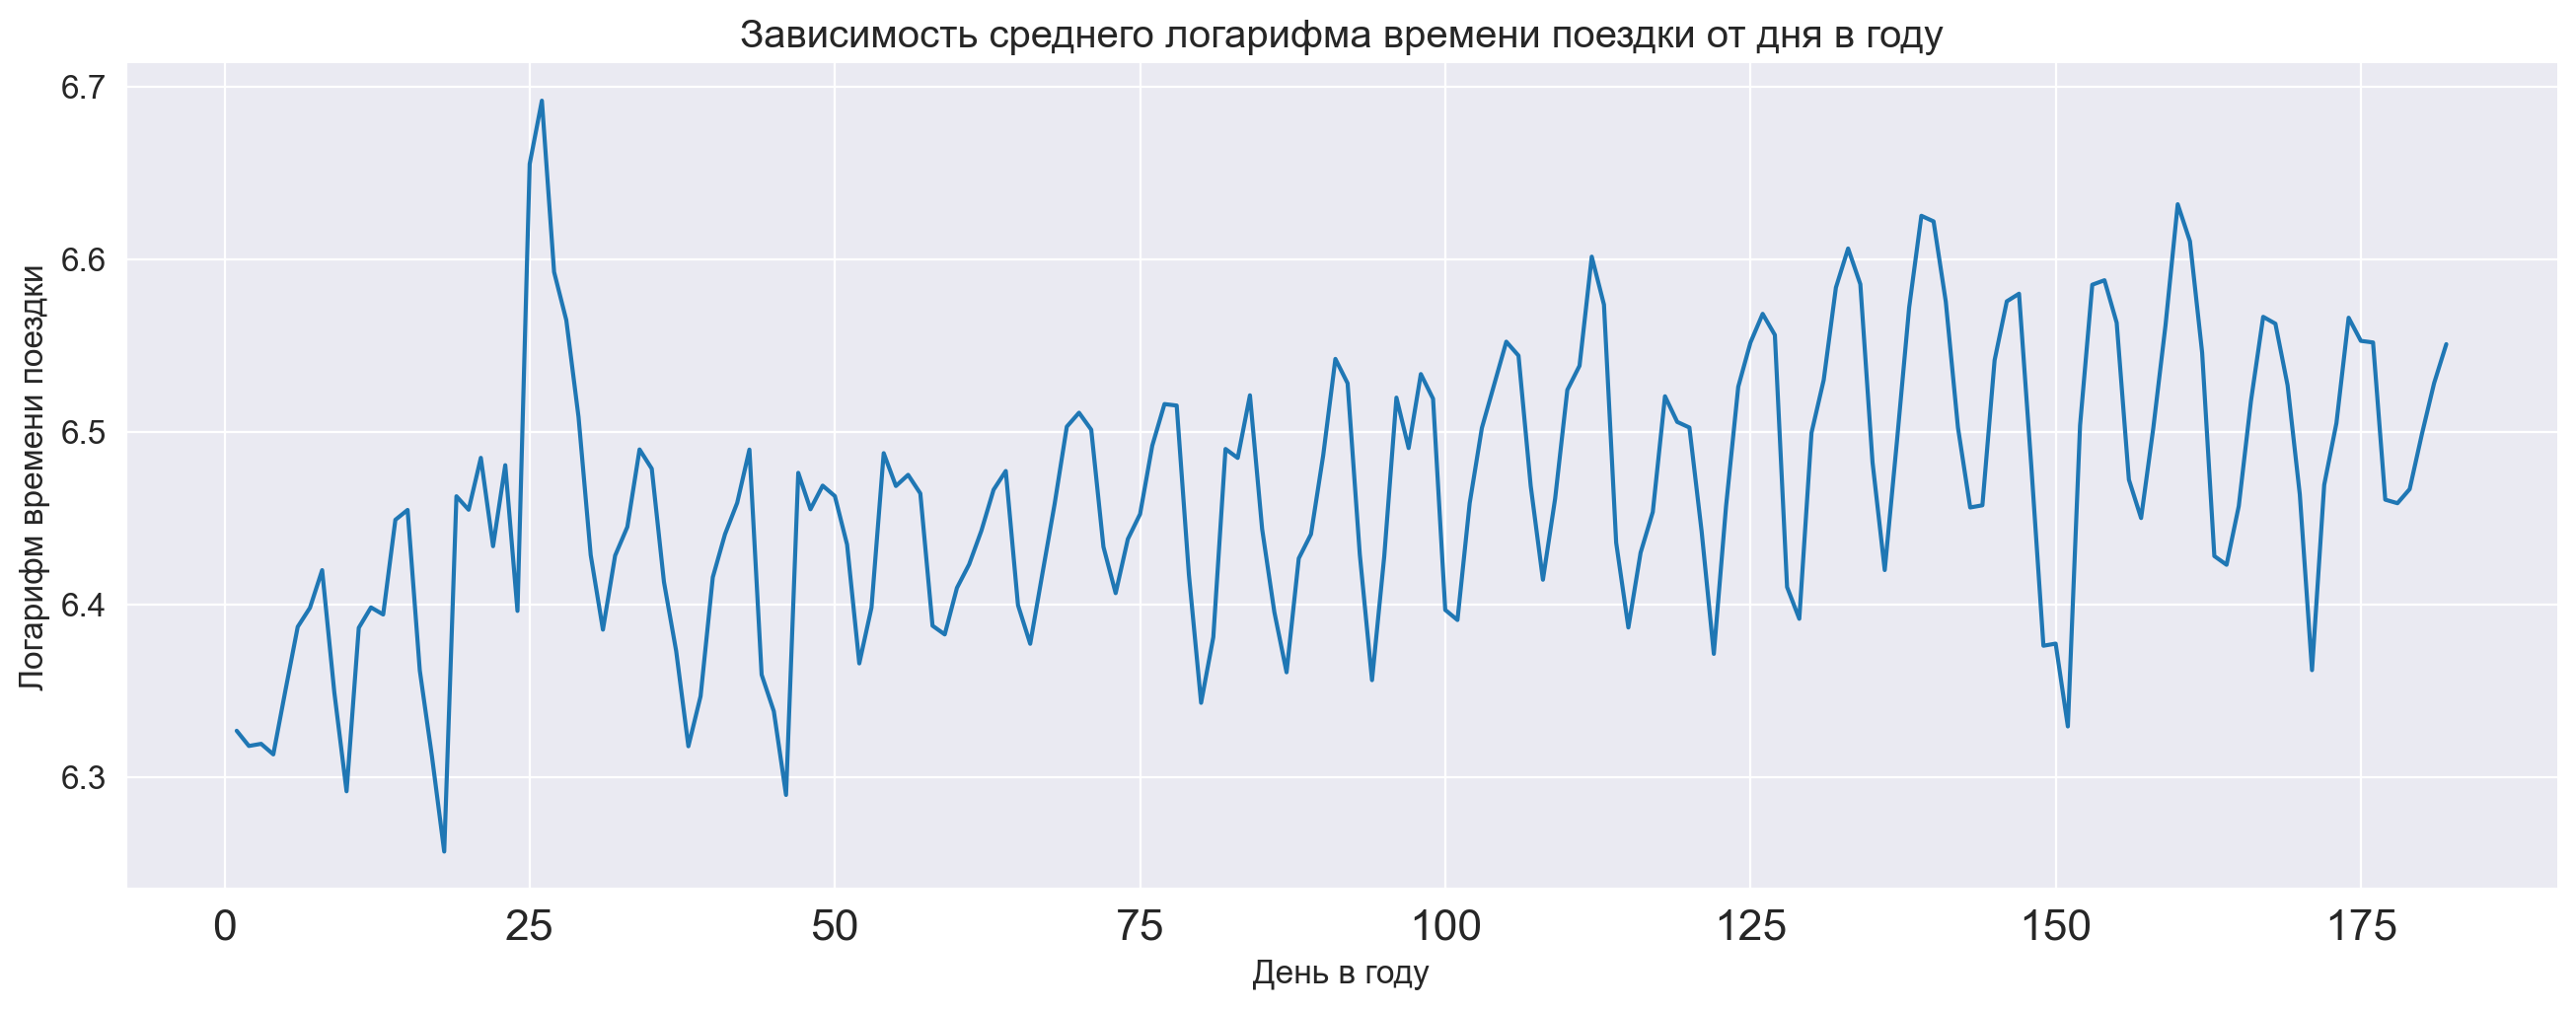

In [18]:
sns.relplot(X_train.groupby(X_train['pickup_datetime'].dt.dayofyear)['log_trip_duration'].mean(), kind='line').figure.set_size_inches(15, 5)
plt.title("Зависимость среднего логарифма времени поездки от дня в году")
plt.xlabel("День в году")
plt.ylabel("Логарифм времени поездки")
plt.xticks(fontsize=16)
plt.show()

**Вопрос (0.5 баллов)**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: в будни такси популярны, из-за чего время поездки больше (скорее всего из-за пробок). В выходные время поездки минимально (особенно в воскресенье). В 5 утра время поездки минимально (самое непопулярное время) и максимально в районе 15-16 часов. Примерно в 25 числах января аномально больше время поездки (скорее всего из-за непогоды).

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [19]:
# День недели, месяц и час уже добавлены)
taxi_df['day_of_year'] = taxi_df['pickup_datetime'].dt.dayofyear

# Пусть аномальные дни будут 23-25 и 150-151. Первая и вторая аномалии соответственно

taxi_df['anomaly_1'] = np.where((taxi_df["day_of_year"] == 23) | \
                              (taxi_df["day_of_year"] == 24) | \
                              (taxi_df["day_of_year"] == 25), 1, 0)

taxi_df['anomaly_2'] = np.where((taxi_df["day_of_year"] == 150) | \
                              (taxi_df["day_of_year"] == 151), 1, 0)

taxi_df.head(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,hour,month,weekday,day_of_year,anomaly_1,anomaly_2
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,17,3,0,74,0,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,0,6,6,164,0,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,11,1,1,19,0,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,19,4,2,97,0,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,13,3,5,86,0,0
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,6.095825,22,1,5,30,0,0
6,id1813257,1,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,5.834811,22,6,4,169,0,0
7,id1324603,2,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,7.347300,7,5,5,142,0,0
8,id1301050,1,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,5.545177,23,5,4,148,0,0
9,id0012891,2,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,7.111512,21,3,3,70,0,0


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ**: Категориальные - день недели, месяц, аномальный день, потому что мы не можем взять 2.5 месяц или 3.7 день недели. Часы можно отнести к численному, потому что 16.75 можно интерпретировать как 16:45

**Задание 1.5 (1 балл)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, mean_squared_log_error


categorical = ['anomaly_1', 'anomaly_2', 'weekday', 'month', 'day_of_year']

# Интерпретируем категориальные признаки в численные (точнее в векторы)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), ['hour'])
])

# пайплайн позволяет объединить несколько операций обработки данных в единую модель
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

# Мы уже разбивали, но сделаем еще раз на всякий
y = taxi_df['log_trip_duration']
X = taxi_df[['anomaly_1',
         'anomaly_2',
         'weekday',
         'month',
         'hour',
         'day_of_year']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Работа (обучение) нейронки (линейной регрессии)
model = pipeline.fit(X_train, y_train)
# Получение предсказанных значений
y_pred = model.predict(X_test)

# Может я дурак, но этот принт не работает, жалуется на squared. Скорее всего проблема в версиях)
# используется python 3.12.7, scikit-learn==1.6.1, VS code

# print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

print("Тестовая выборка")
print(f"RMSLE = {root_mean_squared_log_error(y_test, y_pred)}")
print(f"RMSE = {root_mean_squared_error(y_test, y_pred)}")
print(f"MSE = {mean_squared_error(y_test, y_pred)}")

Тестовая выборка
RMSLE = 0.11244499727987527
RMSE = 0.7901782786720678
MSE = 0.624381712085152


# Линейная регрессия. Часть 2. (5 баллов)

Далее мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [21]:
dimonds_df = pd.read_csv('diamonds.csv')
dimonds_df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 2.1 (0.1 балл)**  Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [22]:
def dimondsCheckNull():
    dimonds_null_count_dict = {}
    dimonds_null_sum = 0

    # Проходимся по всем колонках
    for column in dimonds_df:
        # Добавляем в словарь название колонки и количество пропусков
        dimonds_null_count_dict[dimonds_df[column].name] = dimonds_df[column].isnull().sum()
        # Сумма всех пропусков
        dimonds_null_sum += dimonds_df[column].isnull().sum()

    # преобразование словаря в DataFrame (для красивого отображения)
    dimonds_null_count_df = pd.DataFrame(list(dimonds_null_count_dict.items()), columns=['Column name', 'Null count'])
    
    print(dimonds_null_count_df)

    print(f"Всего в общем: {dimonds_null_sum}")

dimondsCheckNull()

   Column name  Null count
0   Unnamed: 0           0
1        carat           0
2          cut           0
3        color           0
4      clarity           0
5        depth           0
6        table           0
7        price           0
8            x           0
9            y           0
10           z           0
Всего в общем: 0


ООО, повезло, повезло

**Задача 2.2 (0.1 балл)**  Есть ли в наборе данных ненужные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

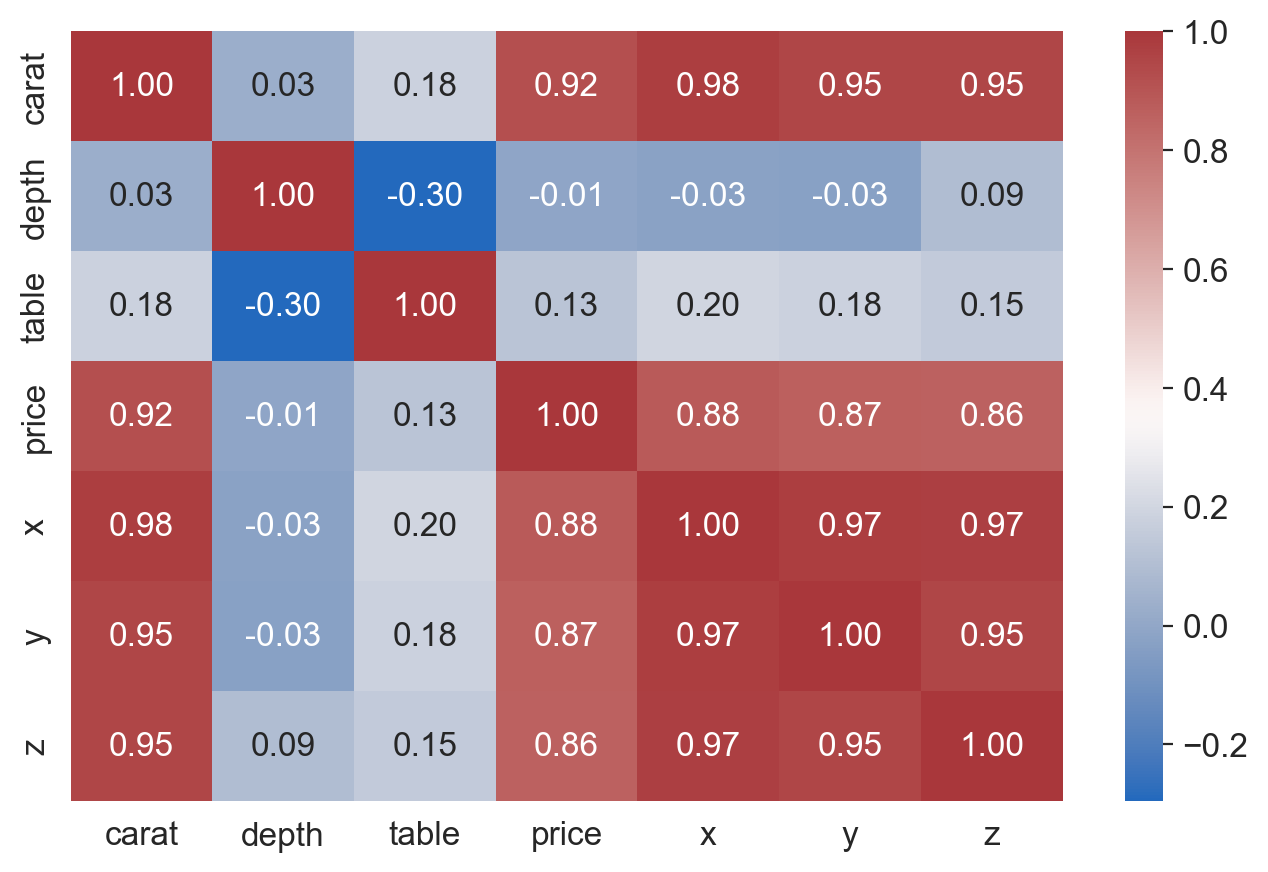

In [23]:
# Для этого построим матрицу корреляции признаков
# Но возьмем пока что только численные признаки
sns.heatmap(dimonds_df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr(), cmap="vlag", annot=True, fmt="0.2f")
plt.show()

In [24]:
# у table и depth очень слабая корреляция с ценой. Можно их удалить. Так же не нравится столбец Unnamed: 0
dimonds_df = dimonds_df.drop("table", axis=1)
dimonds_df = dimonds_df.drop("depth", axis=1)
dimonds_df = dimonds_df.drop("Unnamed: 0", axis=1)
dimonds_df.head(10)

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,338,4.00,4.05,2.39


**Задача 2.3 (0.2 балл)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

**Ответ**: сильнее всего коррелирует карат. Но так же сильно коррелируют и координаты (размеры) бриллианта (логично, что чем больше размер, тем больше карат)

**Задача 2.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [25]:
categorical = ['cut', 'color', 'clarity']
numerical = ['carat', 'x', 'y', 'z']

# Интерпретируем категориальные признаки в численные (точнее в векторы)
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numerical)
])


**Задача 2.5 (0.1 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [26]:
y = dimonds_df['price']
X = dimonds_df[['cut',
         'color',
         'clarity',
         'carat',
         'x',
         'y',
         'z']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

**Задача 2.6 (0.2 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [27]:
# Сделано выше

**Задача 2.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [28]:
from sklearn.linear_model import LinearRegression


pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LinearRegression())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Тестовая выборка")
print(f"MSE = {mean_squared_error(y_test, y_pred)}\n")

y_pred = model.predict(X_train)
print("Тренировочная выборка")
print(f"MSE = {mean_squared_error(y_train, y_pred)}")

Тестовая выборка
MSE = 1322859.0288817063

Тренировочная выборка
MSE = 1271893.7468339275


**Задача 2.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [29]:
def checkCoef():
    mark_list = {}
    # Оценки
    marsk = model['regression'].coef_
    i = 0
    # Название трансформированных столбцов
    for name in model['ohe_and_scaling'].get_feature_names_out():
        mark_list[name] = marsk[i]
        i += 1

    marks_list = sorted(mark_list.items(), key=lambda item: item[1])
    marks_list_df = pd.DataFrame(list(mark_list.items()), columns=['Column name', 'Mark'])
        
    print(marks_list_df.sort_values(by='Mark', ascending=False))

checkCoef()

           Column name         Mark
20      scaling__carat  5242.466776
13     ohe__clarity_IF  1531.898940
18   ohe__clarity_VVS1  1204.576373
19   ohe__clarity_VVS2  1140.623181
5         ohe__color_D   811.597126
16    ohe__clarity_VS1   777.792547
6         ohe__color_E   606.125348
7         ohe__color_F   543.971519
17    ohe__clarity_VS2   459.592394
8         ohe__color_G   343.150184
2       ohe__cut_Ideal   330.922759
3     ohe__cut_Premium   193.498029
4   ohe__cut_Very Good   173.255146
22          scaling__y   129.503317
1        ohe__cut_Good    -6.729309
14    ohe__clarity_SI1  -147.850645
9         ohe__color_H  -159.318303
23          scaling__z  -456.250153
10        ohe__color_I  -634.965139
0        ohe__cut_Fair  -690.946625
21          scaling__x  -769.548875
15    ohe__clarity_SI2 -1105.863538
11        ohe__color_J -1510.560734
12     ohe__clarity_I1 -3860.769252


**Ответ**: На первом месте кол-во карат) Из размеров больше всего важен Y (ширина)

**Задача 2.9 (0.4 баллов)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [30]:
from sklearn.linear_model import Lasso

alpha = 10  # Коэффициент регуляризации

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha=alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Тестовая выборка")
print(f"MSE = {mean_squared_error(y_test, y_pred)}\n")

y_pred = model.predict(X_train)
print("Тренировочная выборка")
print(f"MSE = {mean_squared_error(y_train, y_pred)}")

Тестовая выборка
MSE = 1366934.79508974

Тренировочная выборка
MSE = 1308741.312314387


In [31]:
checkCoef()

           Column name         Mark
20      scaling__carat  4784.399975
13     ohe__clarity_IF   690.465118
18   ohe__clarity_VVS1   531.510985
19   ohe__clarity_VVS2   517.021257
5         ohe__color_D   321.054063
16    ohe__clarity_VS1   171.052150
2       ohe__cut_Ideal   166.299188
6         ohe__color_E   156.056390
7         ohe__color_F   105.935410
8         ohe__color_G    -0.000000
4   ohe__cut_Very Good     0.000000
3     ohe__cut_Premium     0.000000
22          scaling__y    -0.000000
17    ohe__clarity_VS2   -11.981174
1        ohe__cut_Good   -67.054414
21          scaling__x  -253.184711
9         ohe__color_H  -444.194945
23          scaling__z  -461.051138
0        ohe__cut_Fair  -590.960851
14    ohe__clarity_SI1  -627.644361
10        ohe__color_I  -851.679359
15    ohe__clarity_SI2 -1526.193507
11        ohe__color_J -1619.628187
12     ohe__clarity_I1 -3573.686088


In [32]:
from sklearn.linear_model import Ridge

alpha = 10  # Коэффициент регуляризации

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha=alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Тестовая выборка")
print(f"MSE = {mean_squared_error(y_test, y_pred)}\n")

y_pred = model.predict(X_train)
print("Тренировочная выборка")
print(f"MSE = {mean_squared_error(y_train, y_pred)}")

Тестовая выборка
MSE = 1322308.3986202485

Тренировочная выборка
MSE = 1272054.2440592889


In [33]:
checkCoef()

           Column name         Mark
20      scaling__carat  5206.582931
13     ohe__clarity_IF  1513.699696
18   ohe__clarity_VVS1  1192.234653
19   ohe__clarity_VVS2  1128.601052
5         ohe__color_D   805.652040
16    ohe__clarity_VS1   765.906691
6         ohe__color_E   604.168747
7         ohe__color_F   539.629473
17    ohe__clarity_VS2   450.334462
8         ohe__color_G   341.869859
2       ohe__cut_Ideal   332.345867
3     ohe__cut_Premium   193.414219
4   ohe__cut_Very Good   174.859492
22          scaling__y   116.995546
1        ohe__cut_Good    -7.513560
14    ohe__clarity_SI1  -156.334659
9         ohe__color_H  -160.500610
23          scaling__z  -449.307933
10        ohe__color_I  -632.757410
0        ohe__cut_Fair  -693.106017
21          scaling__x  -731.700567
15    ohe__clarity_SI2 -1109.997925
11        ohe__color_J -1498.062100
12     ohe__clarity_I1 -3784.443970


**Ответ**: в обоих случаях коэффициенты карата уменьшились (больше всего у Lasso), но стоит заметить, что Lasso показал худший результат на тестовой выборке.

**Задача 2.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

c:\Users\artem\Desktop\Labs\Sirius\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72015360.1538086, tolerance: 59327375.88300501
  model = cd_fast.sparse_enet_coordinate_descent(


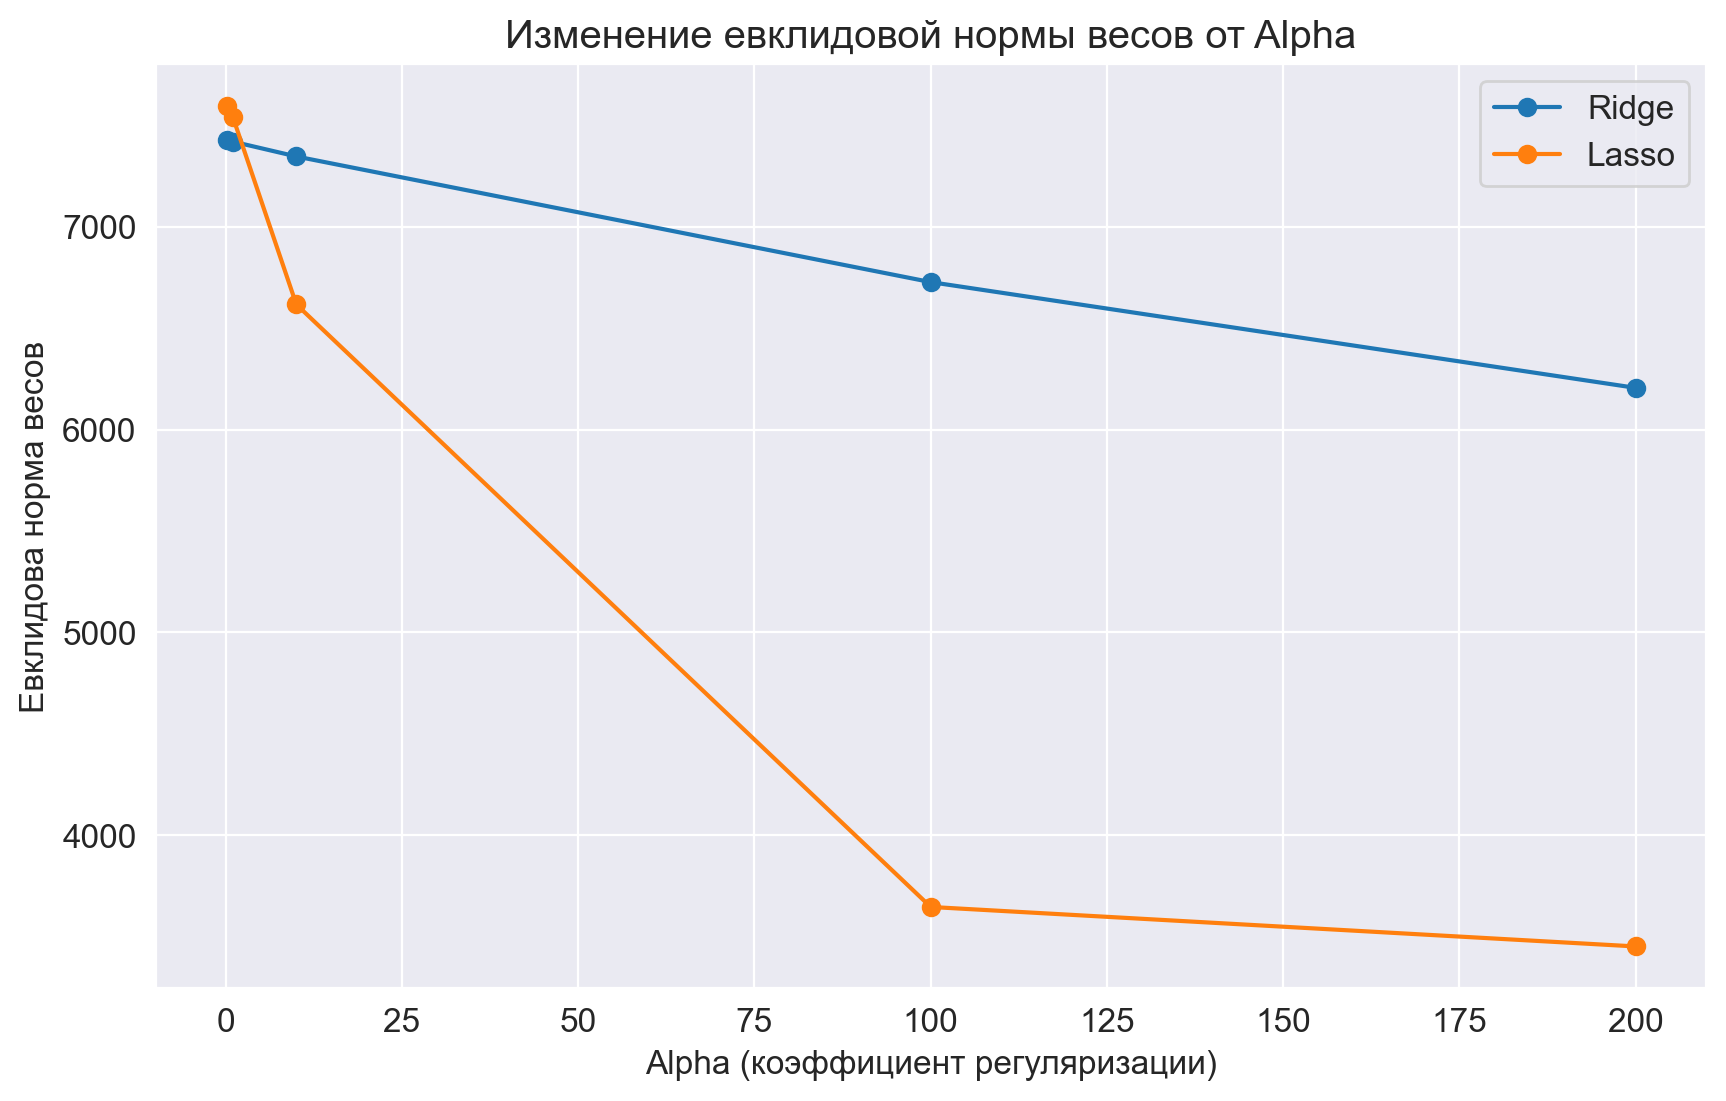

In [34]:
alphas = [0.1, 1, 10, 100, 200]
ridge_norms = []
lasso_norms = []

for alpha in alphas:
    # Ridge
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Ridge(alpha=alpha))
    ])
    model = pipeline.fit(X_train, y_train)
    ridge_norms.append(np.linalg.norm(model['regression'].coef_))

    # Lasso
    pipeline = Pipeline(steps=[
        ('ohe_and_scaling', column_transformer),
        ('regression', Lasso(alpha=alpha))
    ])
    model = pipeline.fit(X_train, y_train)
    lasso_norms.append(np.linalg.norm(model['regression'].coef_))

plt.figure(figsize=(10, 6))

plt.plot(alphas, ridge_norms, marker='o', label='Ridge')
plt.plot(alphas, lasso_norms, marker='o', label='Lasso')

plt.xlabel('Alpha (коэффициент регуляризации)')
plt.ylabel('Евклидова норма весов')
plt.title('Изменение евклидовой нормы весов от Alpha')
# plt.xscale('log') # шкала alpha в логарифмическом масштабе
plt.grid(True)
plt.legend()
plt.show()

**Ответ**: Lasso намного агрессивнее уменьшает веса. Lasso может обнулить неважные признаки, что сразу будет заметно)

**Задача 2.11 (1 балл)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

c:\Users\artem\Desktop\Labs\Sirius\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122901731.0940628, tolerance: 47234925.03802863
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\artem\Desktop\Labs\Sirius\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19108679344.640934, tolerance: 47234925.03802863
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\artem\Desktop\Labs\Sirius\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18985960176.3792, tolerance: 47276044.751780875
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\artem\Desktop\Labs\Sirius\venv\Li

Лучшее альфа: 0.5
Минимальное среднее MSE: 1275672.6099935016


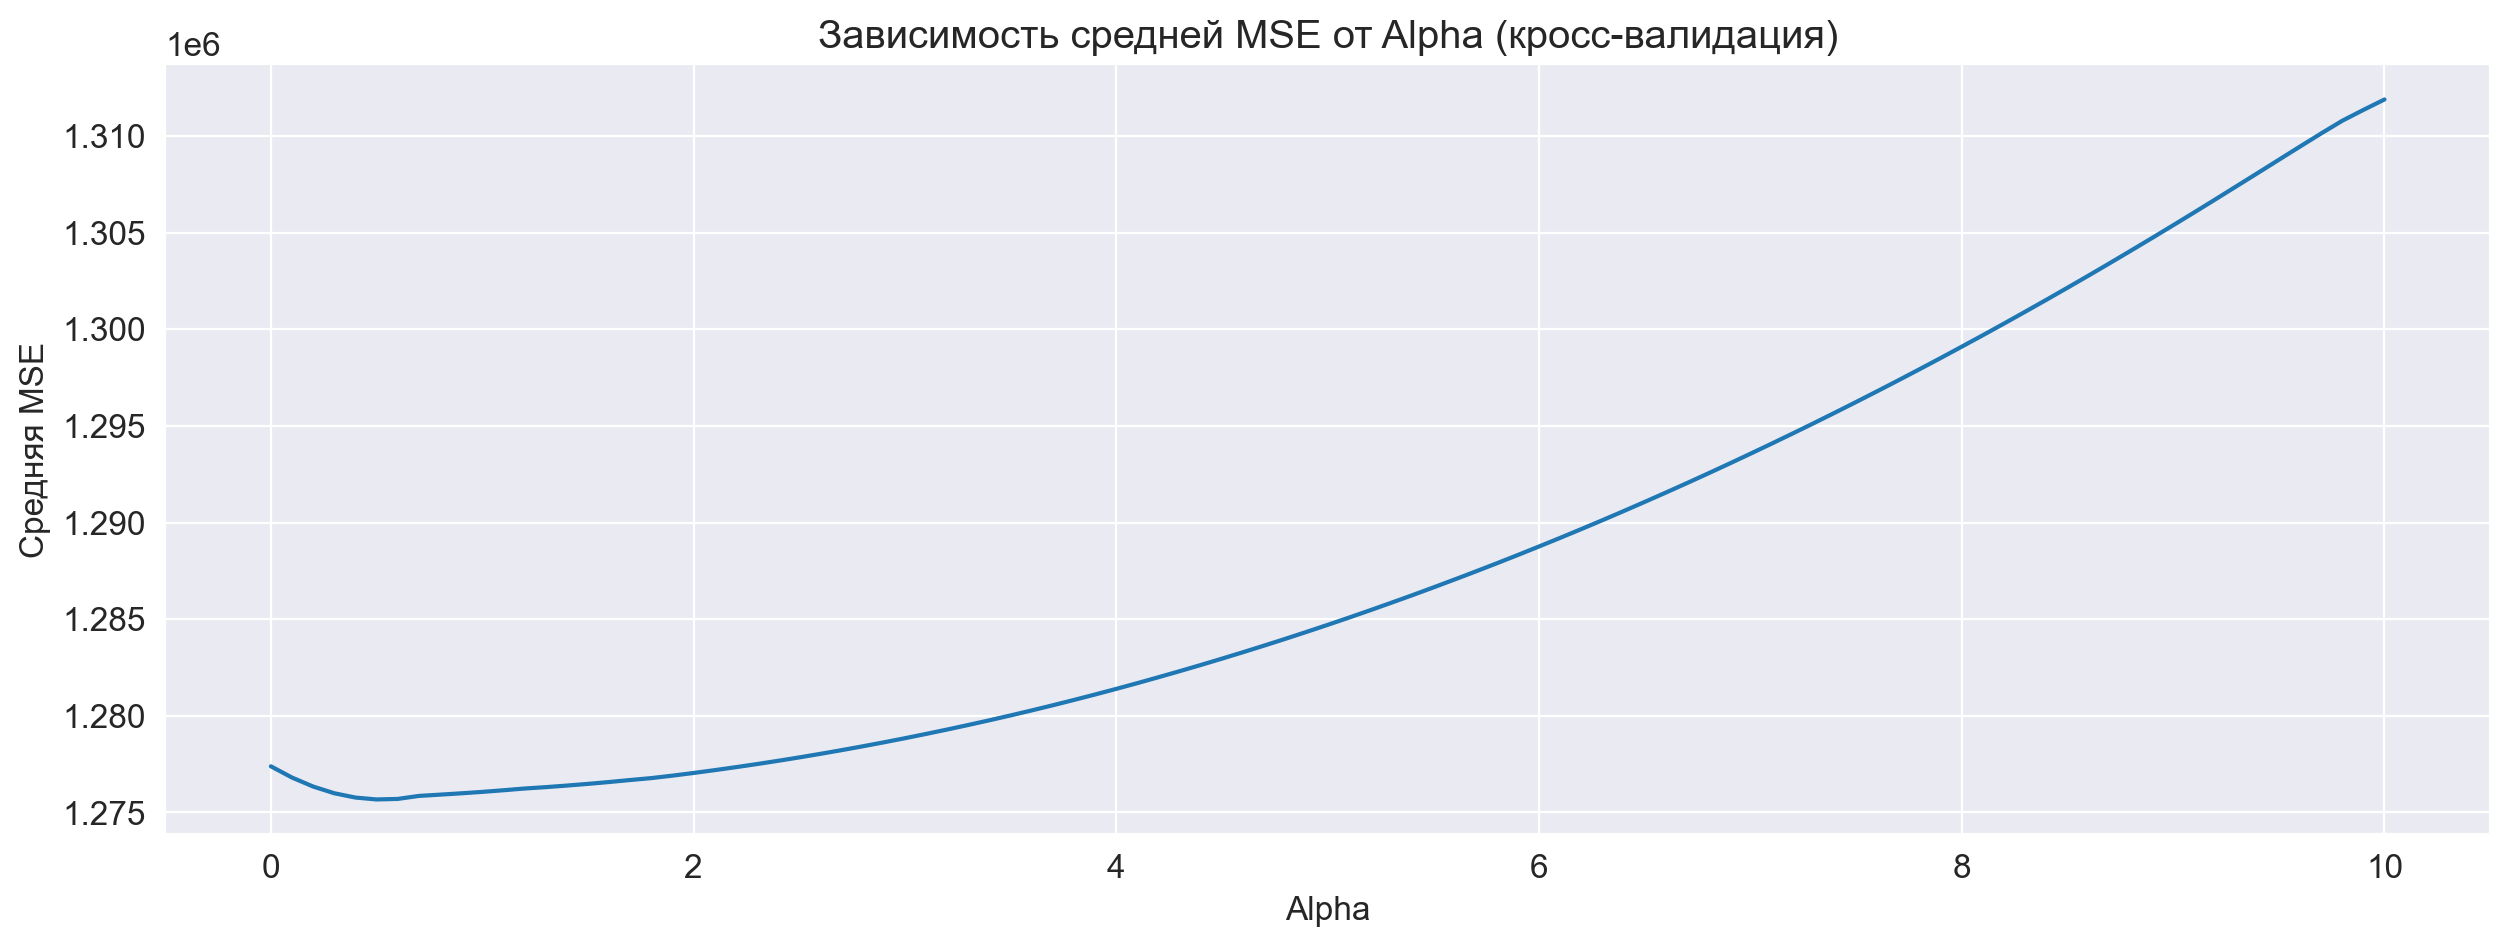

In [35]:
from sklearn.linear_model import LassoCV


alphas = np.arange(0, 10.1, 0.1)

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LassoCV(alphas=alphas, cv=5))
])

model = pipeline.fit(X_train, y_train)

mse_path = pipeline['regression'].mse_path_

# находим среднюю ошибку для каждого alpha
mean_mse = np.mean(mse_path, axis=1)

# минимальная ошибка
min_mse_index = np.argmin(mean_mse)

best_alpha = pipeline['regression'].alphas_[min_mse_index]

print(f"Лучшее альфа: {best_alpha}")
print(f"Минимальное среднее MSE: {mean_mse[min_mse_index]}")

plt.figure(figsize=(15, 5))
plt.plot(pipeline['regression'].alphas_, mean_mse)
plt.xlabel("Alpha")
plt.ylabel("Средняя MSE")
plt.title("Зависимость средней MSE от Alpha (кросс-валидация)")
plt.show()

**Задача 2.12 (1 балл)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [36]:
alpha = 0.5  # Коэффициент регуляризации

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha=alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Тестовая выборка")
print(f"MSE = {mean_squared_error(y_test, y_pred)}\n")

y_pred = model.predict(X_train)
print("Тренировочная выборка")
print(f"MSE = {mean_squared_error(y_train, y_pred)}")

Тестовая выборка
MSE = 1322177.417237686

Тренировочная выборка
MSE = 1272036.0556890413


In [37]:
checkCoef()

           Column name         Mark
20      scaling__carat  5219.429022
13     ohe__clarity_IF   965.454968
18   ohe__clarity_VVS1   646.222069
19   ohe__clarity_VVS2   584.672841
5         ohe__color_D   461.514518
6         ohe__color_E   258.166073
16    ohe__clarity_VS1   222.908208
7         ohe__color_F   196.487329
2       ohe__cut_Ideal   156.026822
22          scaling__y    77.001117
3     ohe__cut_Premium    14.326296
4   ohe__cut_Very Good     0.000000
8         ohe__color_G     0.000000
17    ohe__clarity_VS2   -88.835247
1        ohe__cut_Good  -176.481172
23          scaling__z  -453.144806
9         ohe__color_H  -499.369443
14    ohe__clarity_SI1  -696.824006
21          scaling__x  -701.005215
0        ohe__cut_Fair  -856.084664
10        ohe__color_I  -971.566485
15    ohe__clarity_SI2 -1651.903395
11        ohe__color_J -1841.719101
12     ohe__clarity_I1 -4372.253699


**Ответ**: Если качество среза очень хорошее (cut very good) и цвет G, то для нас это бесполезная информация). Так же практически бесполезно cut premium, y, clarity VS2

**Задача 2.13 (1 балл)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

Результаты взяты с кода выше

**Линейная регрессия:**

Тестовая выборка
MSE = 1322859.0288817063

Тренировочная выборка
MSE = 1271893.7468339275


**Lasoo:**

Тестовая выборка
MSE = 1322177.417237686

Тренировочная выборка
MSE = 1272036.0556890413

У Lasso ошибка на тестовой выборке чуть меньше, значит лучше использовать её. Она лучше, потому что мы чуть отрегулировали (уменьшили) веса карата (самого важного признака) и больше обращаем внимание на остальные признаки (т.е. основываемся не только на одном карате). Так же в Lasso совсем не используются "ненужные" признаки, что тоже сказалось на качестве в лучшую сторону

# Творческий Бонус (0.01 балл)

Учиться - это, конечно, хорошо, но важно не забывать отдыхать, посвящать время себе и близким. Выберете рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека этим блюдом. Кратко опишите ваши впечатления, прикрепите рецепт, фотографии блюда и довольного гостя.

`### ваш кулинарный опыт здесь ###`

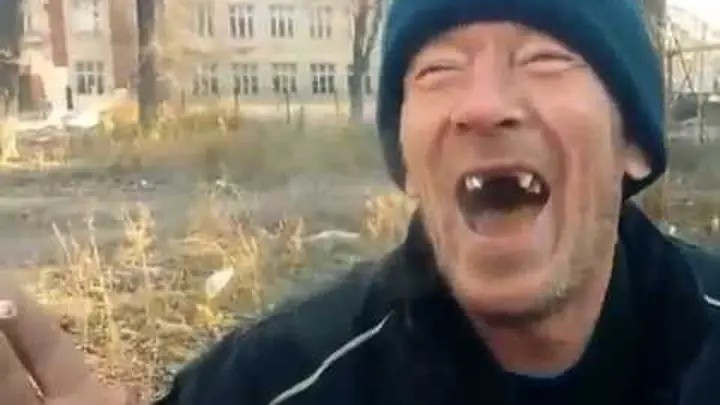

# Оценка работы (посчитайте ваши набранные баллы)

В теории 10

На практике около 9